출처 : 
- 딥러닝을 위한 최적화와 수치해석 (황윤구, 양한별, 남가람북스) 
- https://github.com/DNRY/dlopt

# 6장. 고전 수치최적화 알고리즘

## 6.3 그래디언트 디센트(Gradient Descent)

### 6.3.1 예제로 배우는 그래디언트 디센트

In [1284]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 6. Classical Numerical Optimization Algorithms

In this lecture note, we delve into classical methods for numerical optimization, focusing on Gradient Descent (GD). GD is a first-order iterative algorithm used to find a local minimum of a differentiable function. Mathematically, for a function \( f(\mathbf{w}) \), the update rule is:

$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \alpha \nabla f(\mathbf{w}^{(k)})
$$

where \( \alpha > 0 \) is the learning rate, and \( \nabla f \) is the gradient. Why might a small \( \alpha \) lead to slow convergence, while a large one causes overshooting? We'll explore through examples.

#### 예제 1

### $$ f(x) = x^2 - 4x + 6 $$

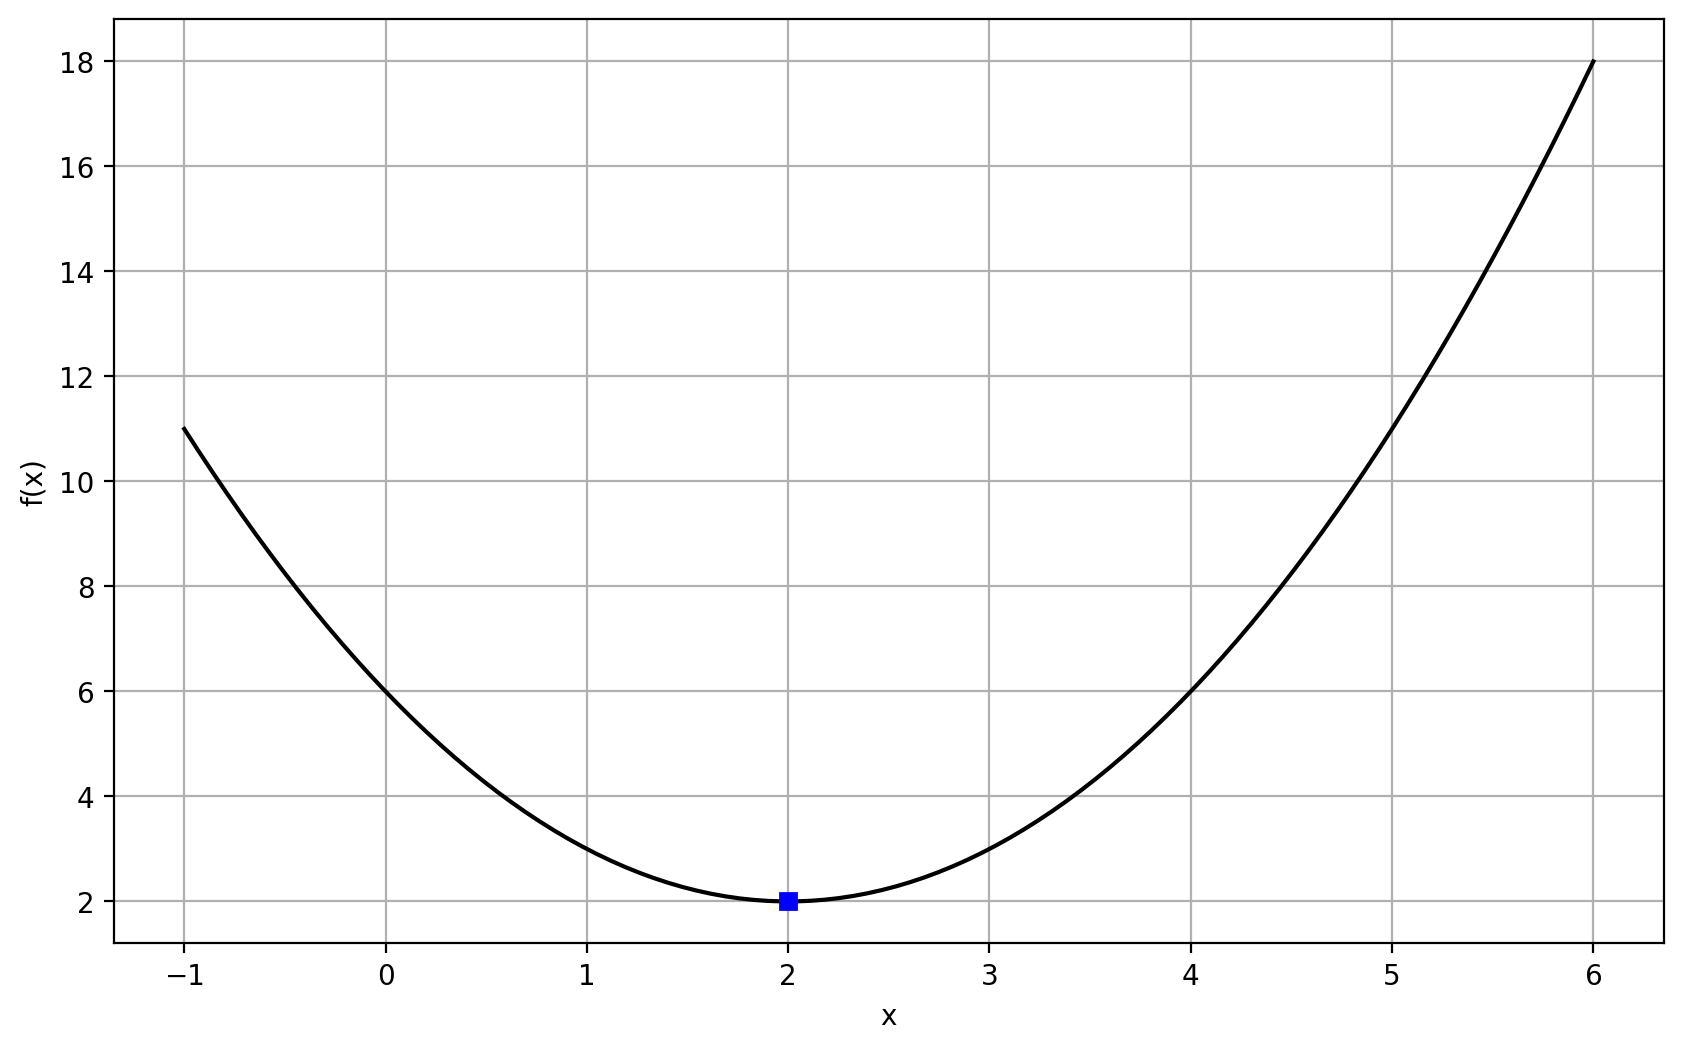

In [1285]:
f = lambda x: x**2 - 4*x + 6 # 함수
x = np.linspace(-1, 6, 100) # 정의역(domain)
y = f(x) # 함수 계산

# 함수 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sb') # 최솟값 위치 표시
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### $$ \nabla f(x)=2x-4$$

In [1286]:
grad_f = lambda x: 2 * x - 4 # 그래디언트

x0 = 0.0 # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률

print("step\tx\tf(x)\tgrad_f(x)")
print("{:02d}\t{:6.5f}\t{:6.5f}\t{:6.5f}".format(0, x0, f(x0), grad_f(x0)))

for i in range(MaxIter):
    grad = grad_f(x0)
    x1 = x0 - learning_rate * grad
    x0 = x1
    print("{:02d}\t{:6.5f}\t{:6.5f}\t{:6.5f}".format(i+1, x0, f(x0), grad_f(x0)))

step	x	f(x)	grad_f(x)
00	0.00000	6.00000	-4.00000
01	1.00000	3.00000	-2.00000
02	1.50000	2.25000	-1.00000
03	1.75000	2.06250	-0.50000
04	1.87500	2.01562	-0.25000
05	1.93750	2.00391	-0.12500
06	1.96875	2.00098	-0.06250
07	1.98438	2.00024	-0.03125
08	1.99219	2.00006	-0.01562
09	1.99609	2.00002	-0.00781
10	1.99805	2.00000	-0.00391


### 경사 하강법 알고리즘 (Gradient Descent Algorithm)

**목적:** 함수 $f(x)$를 최소화하는 $x^*$를 찾기

**반복 업데이트 공식:**
$$x_{k+1} = x_k - \alpha \nabla f(x_k)$$

여기서:
- $x_k$: $k$번째 반복에서의 현재 위치 (코드의 `x0`)
- $x_{k+1}$: 다음 반복 위치 (코드의 `x1`)
- $\alpha$: 학습률 (learning rate, `learning_rate`)
- $\nabla f(x_k)$: $x_k$에서의 그래디언트 (코드의 `grad_func(x0)`)

**알고리즘 동작:**
1. 초깃값 $x_0$ 설정
2. 매 반복마다:
   - 현재 위치에서 그래디언트 계산: $\nabla f(x_k)$
   - 그래디언트의 **반대 방향**으로 이동: $x_{k+1} = x_k - \alpha \nabla f(x_k)$
   - 경로 저장
3. $k = $ MaxIter에 도달하면 종료

**출력:**
- 최종 위치 $x^*$ (추정된 최솟값 위치)
- 함수값 $f(x^*)$
- 경로 $\{x_0, x_1, x_2, \ldots, x_k\}$

**핵심:** 그래디언트 $\nabla f(x)$는 함수가 **가장 빠르게 증가**하는 방향이므로, 그 **반대 방향**($-\nabla f(x)$)으로 이동하면 함수값이 감소합니다.

In [1287]:
def gradient_descent(func, grad_func, x0, learning_rate=0.01, MaxIter=10, verbose=True):
    '''
    Gradient Descent Algorithm
    Inputs:
        func : function to be minimized
        grad_func : gradient of the function
        x0 : initial point
        learning_rate : learning rate
        MaxIter : maximum number of iterations
        verbose : if True, print progress
    Outputs:
        x0 : estimated minimum point
        func(x0) : function value at minimum point
        paths : array of points visited during optimization
    '''
    paths = [x0]  # 초기값부터 저장
    for i in range(MaxIter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            if i % 100 == 0:
                print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), np.array(paths))

000 : 0.800, 3.44E+00


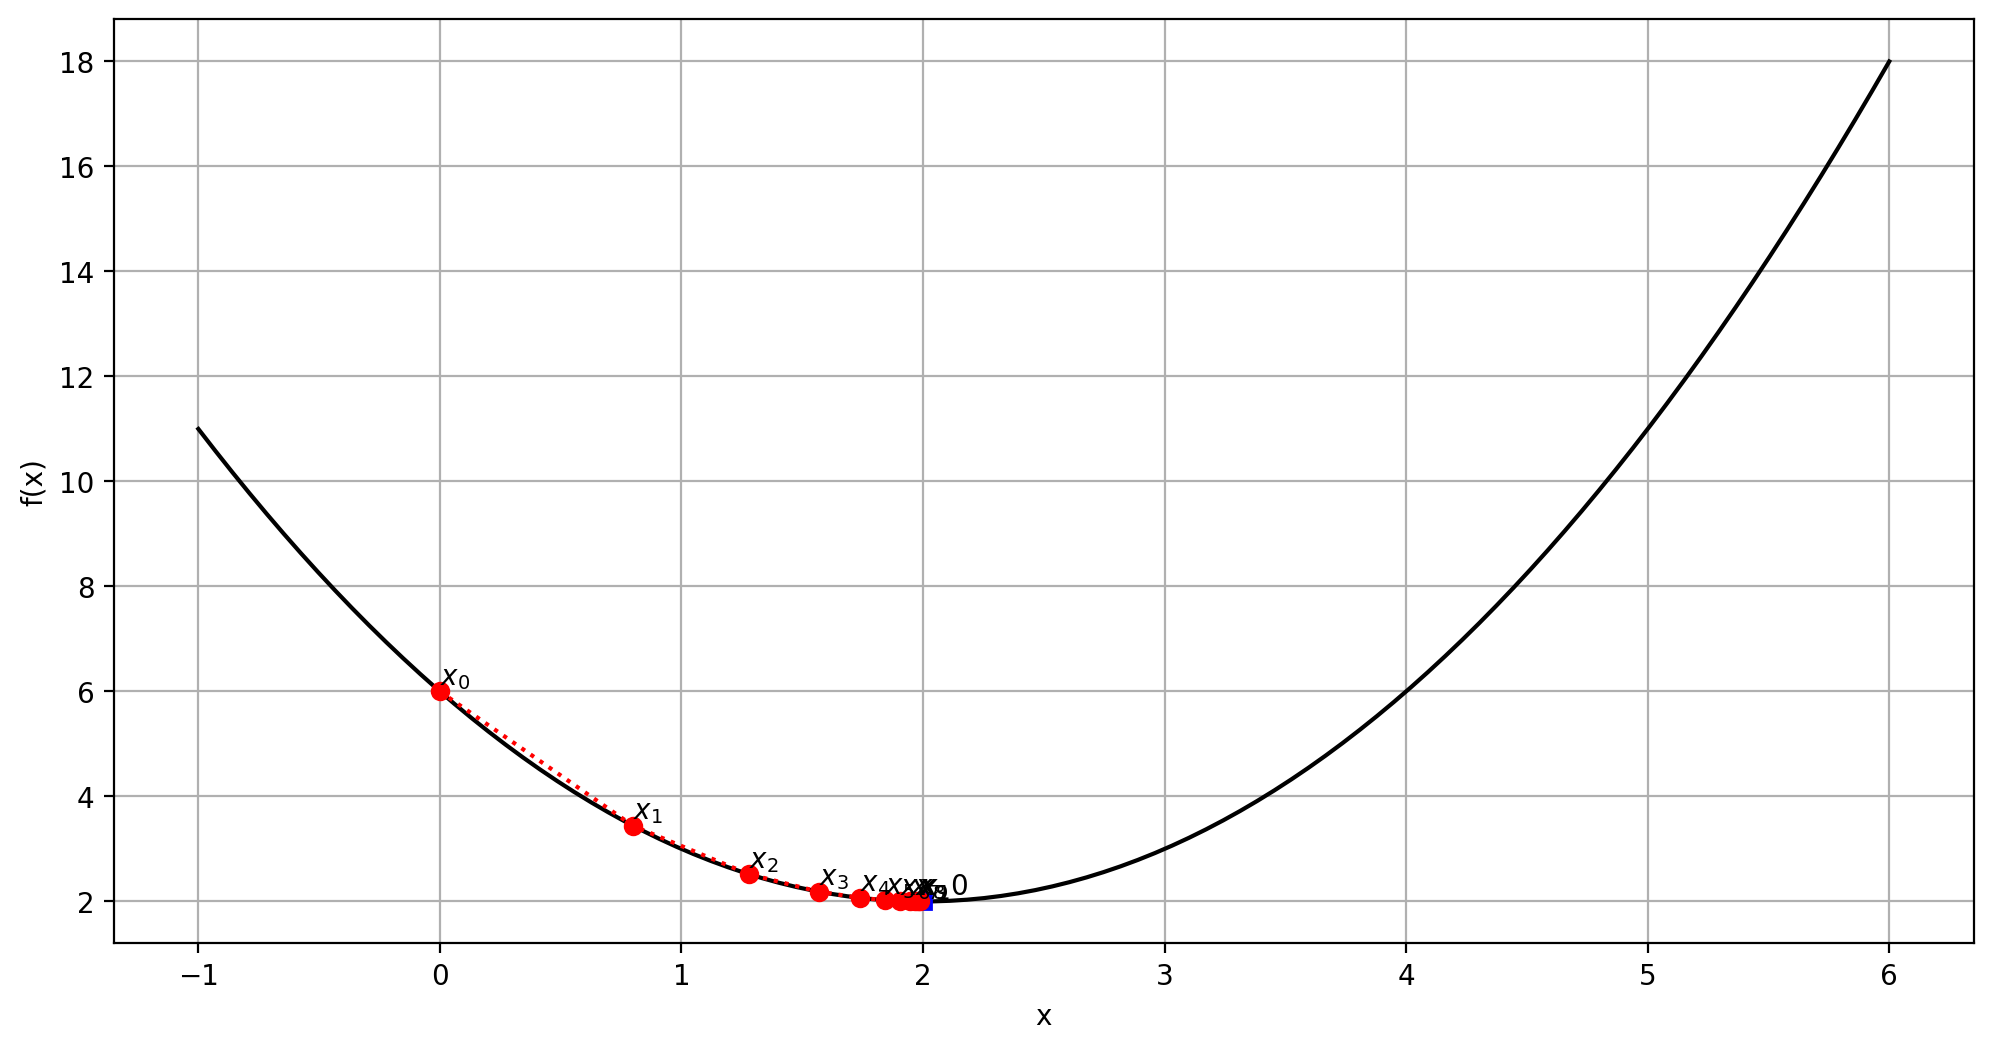

In [1288]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.2, MaxIter=10)

plt.figure(figsize=(12, 6))

plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sb')
plt.plot(paths, f(paths), 'ro:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### 큰 학습률

000 : 4.200, 6.84E+00


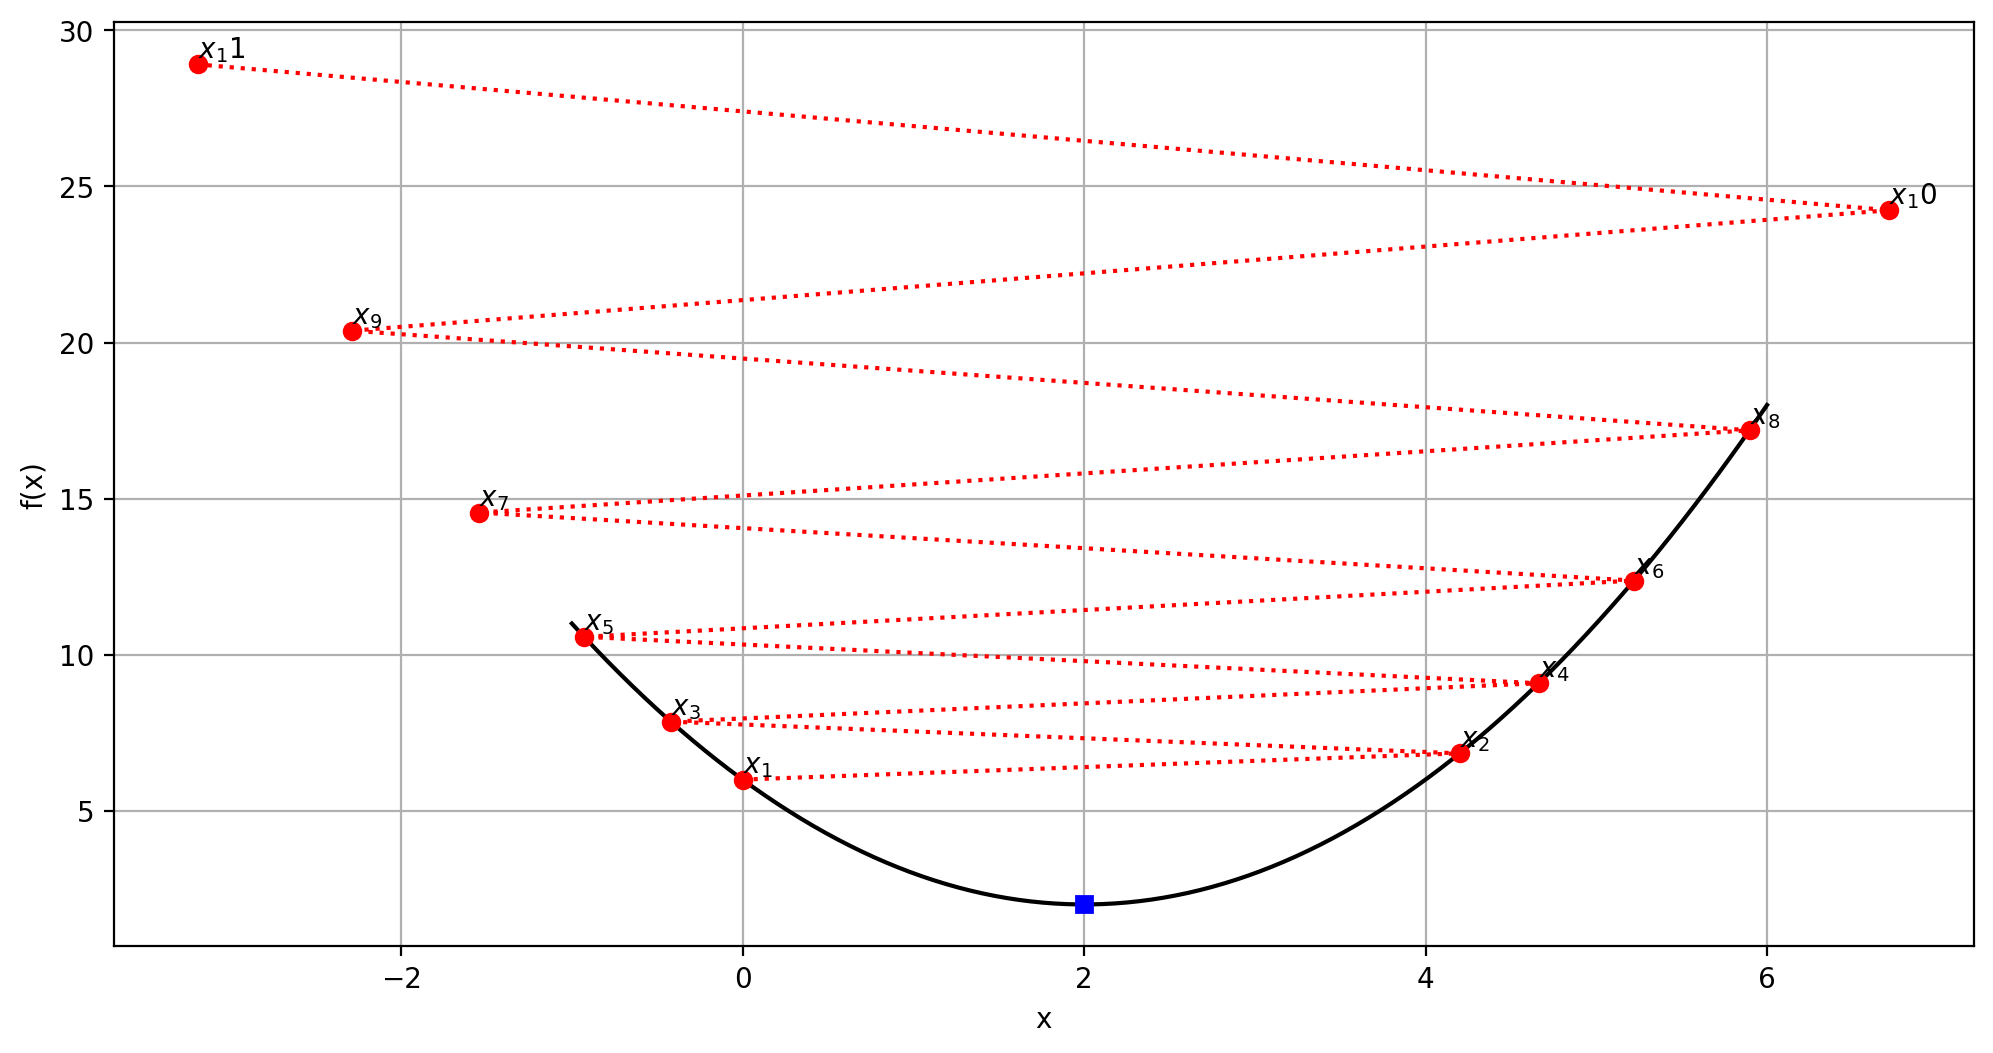

In [1289]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=1.05, MaxIter=10)

plt.figure(figsize=(12, 6))

plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sb') # 정답
plt.plot(paths, f(paths), 'ro:') # 추정치의 경로
for k, point in enumerate(paths):
    # 위치 표시
    plt.text(point, f(point), '$x_{0}$'.format(k+1), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### 낮은 학습률

000 : 0.200, 5.24E+00


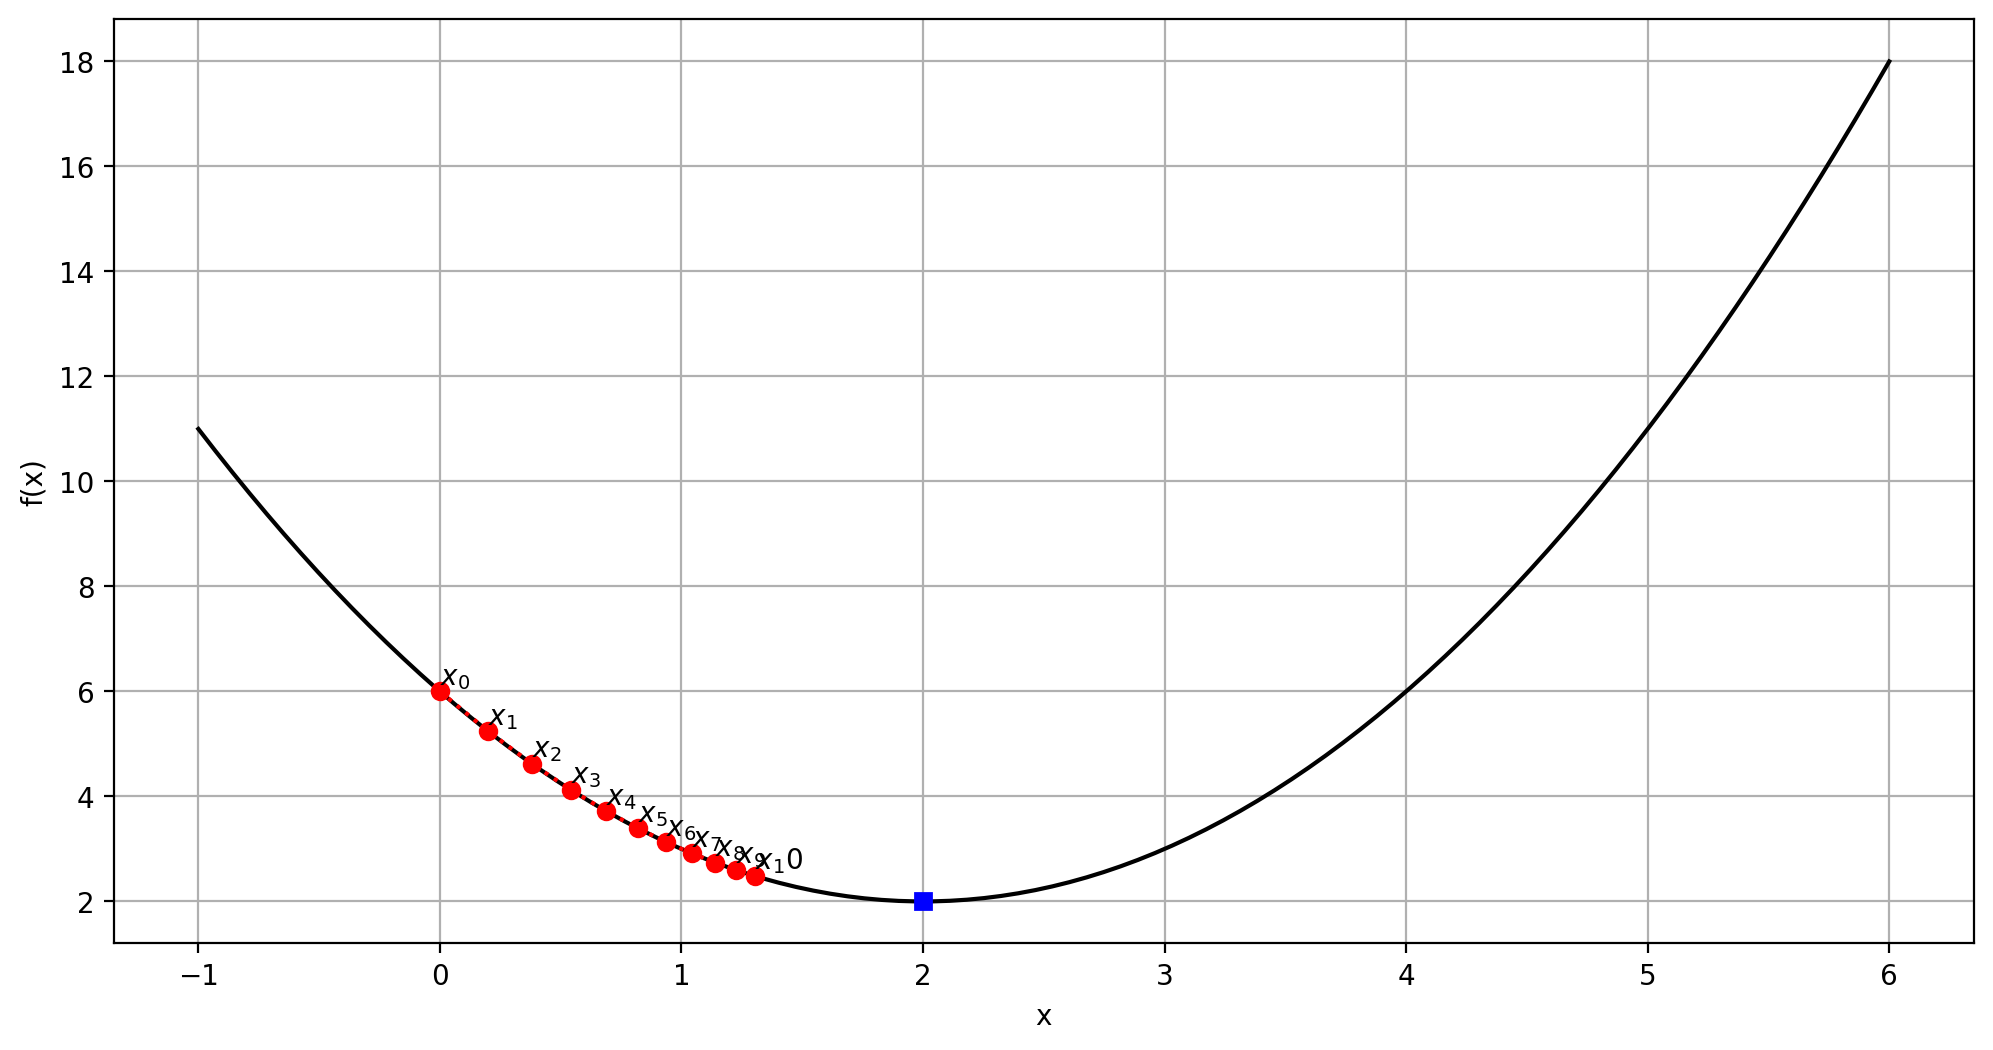

In [1290]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.05, MaxIter=10)

plt.figure(figsize=(12, 6))

plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sb') # 정답
plt.plot(paths, f(paths), 'ro:') # 추정치의 경로
for k, point in enumerate(paths):
    # 위치 표시
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [1291]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.05, MaxIter=1000)
print(xopt)
# 출력값 1.9999999999999991

000 : 0.200, 5.24E+00
100 : 2.000, 2.00E+00
200 : 2.000, 2.00E+00
300 : 2.000, 2.00E+00
400 : 2.000, 2.00E+00
500 : 2.000, 2.00E+00
600 : 2.000, 2.00E+00
700 : 2.000, 2.00E+00
800 : 2.000, 2.00E+00
900 : 2.000, 2.00E+00
1.9999999999999991


#### 예제 2

### $$ f(x,y) = 3(x-2)^2 + (y-2)^2$$

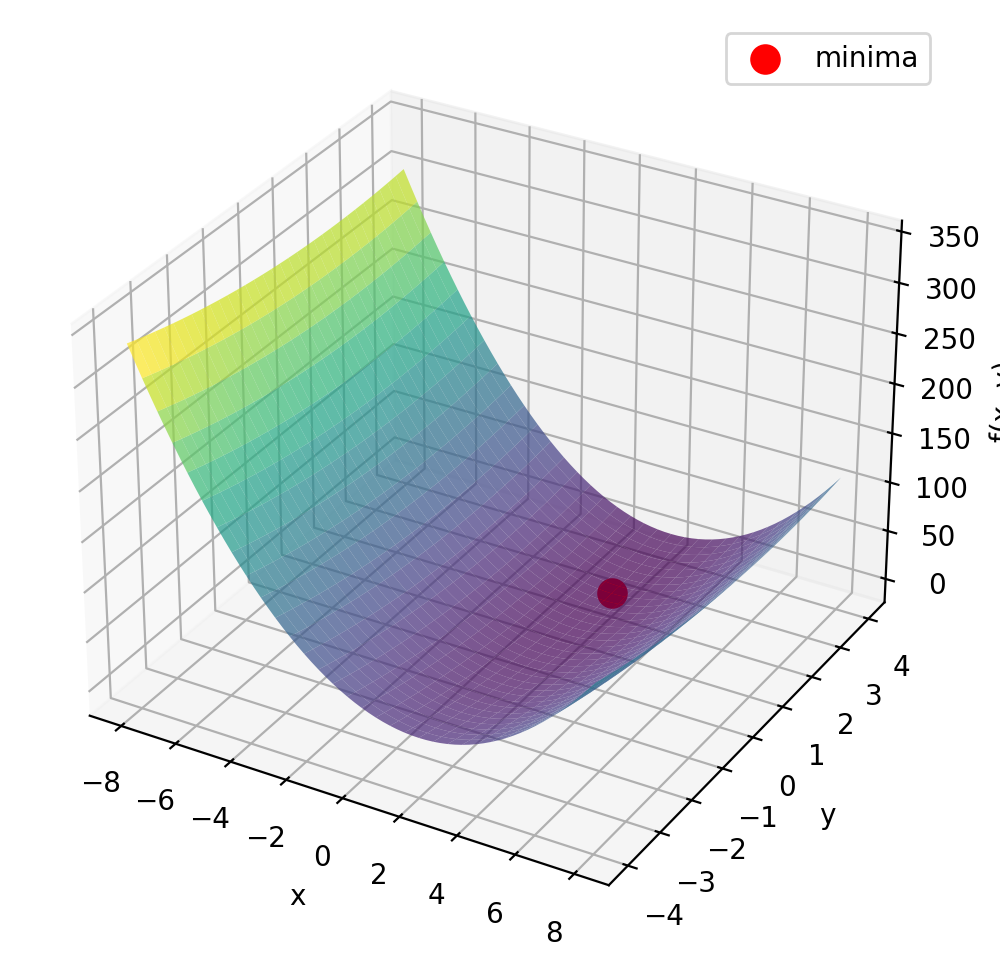

In [1292]:
# 정의역
xmin, xmax, xstep = -8.0, 8.0, .25
ymin, ymax, ystep = -4.0, 4.0, .125

x_vals = np.arange(xmin, xmax + xstep, xstep)
y_vals = np.arange(ymin, ymax + ystep, ystep)
x, y = np.meshgrid(x_vals, y_vals)

f_xy = 3 * (x - 2) ** 2 + (y - 2) ** 2  # 2D 배열

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_xy, cmap='viridis', alpha=0.7)

# 최소값 표시
ax.scatter(2, 2, 0, color='red', s=100, label='minima')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

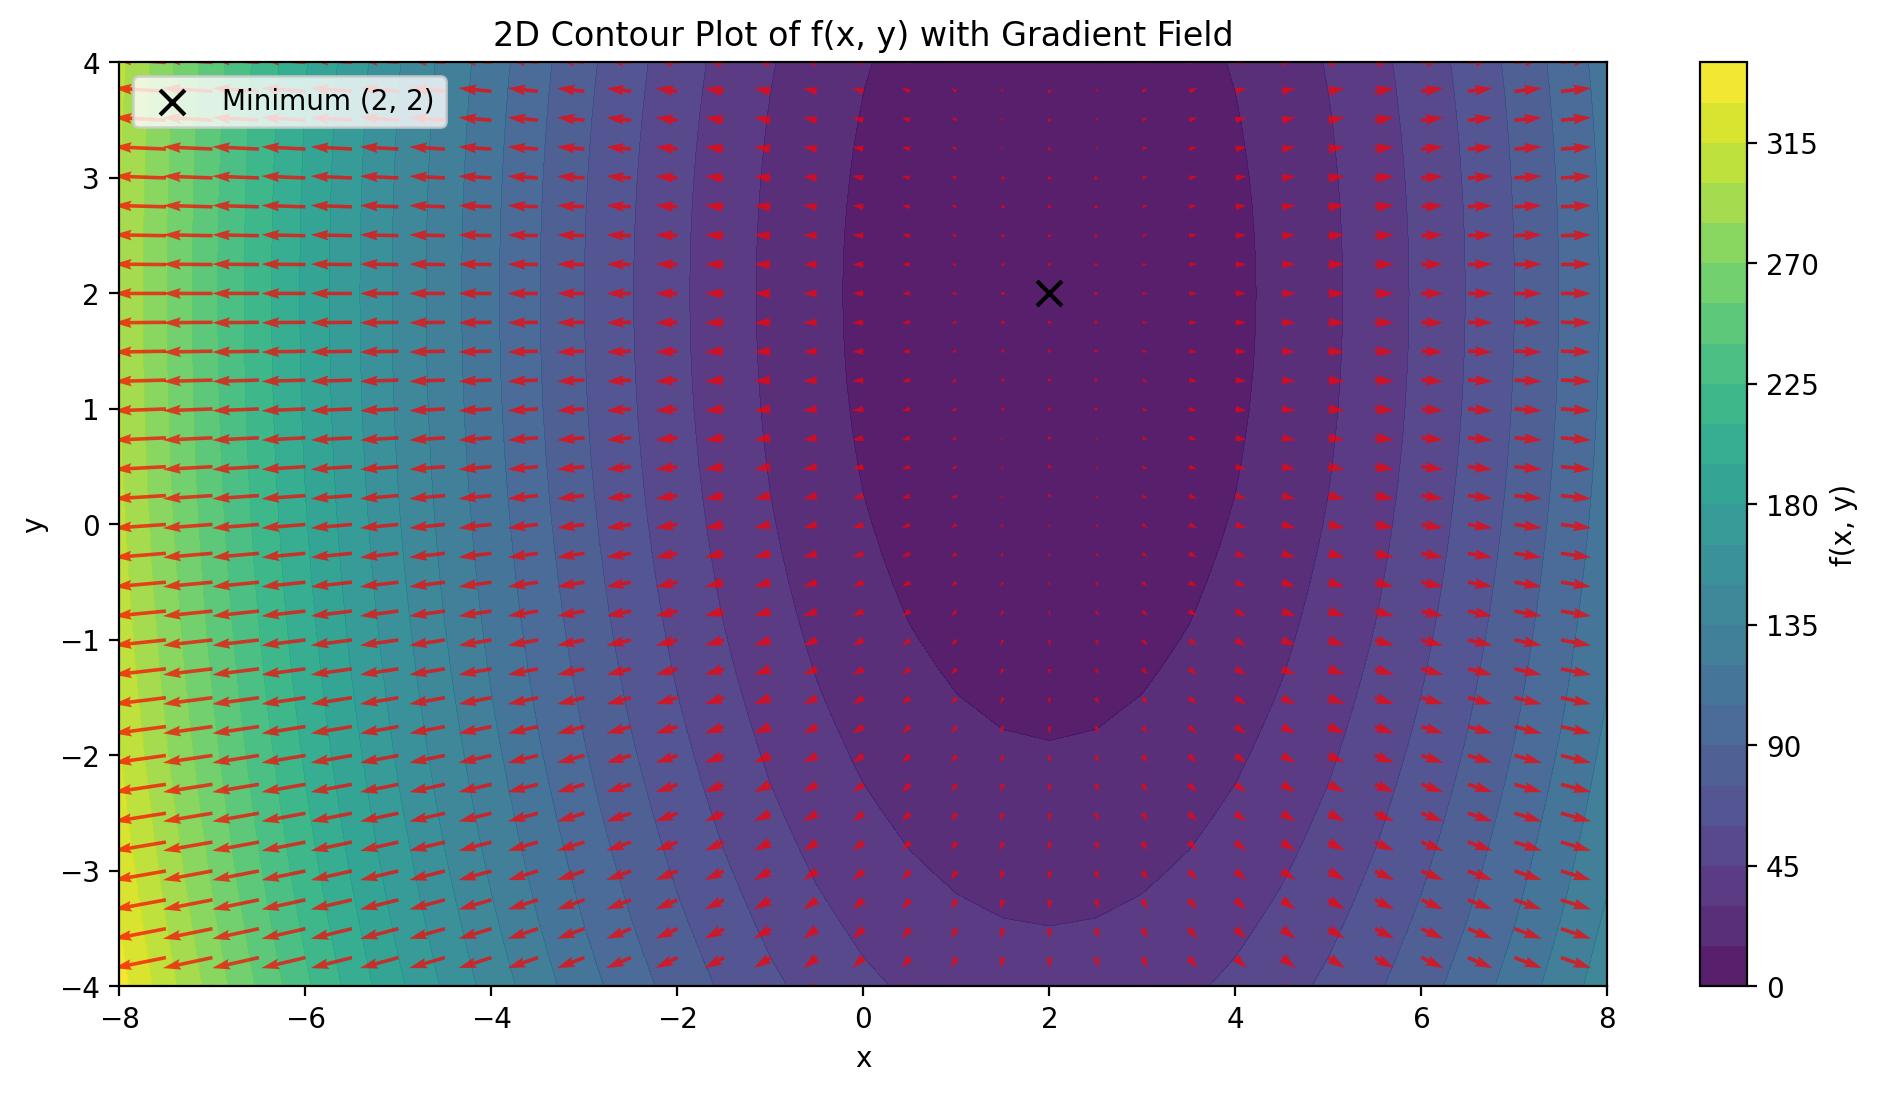

In [1293]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scalar function f(x, y)
f = lambda x, y: 3 * (x - 2)**2 + (y - 2)**2

# Gradient components
grad_f_x = lambda x, y: 6 * (x - 2)
grad_f_y = lambda x, y: 2 * (y - 2)

# Domain
xmin, xmax, xstep = -8.0, 8.0, 0.5
ymin, ymax, ystep = -4.0, 4.0, 0.25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))

# Compute function and gradients
z = f(x, y)
u = grad_f_x(x, y)
v = grad_f_y(x, y)

# --- 2D Contour Plot with Gradient Field ---
plt.figure(figsize=(12, 6))
contours = plt.contourf(x, y, z, levels=30, cmap='viridis', alpha=0.9)
plt.colorbar(contours, label='f(x, y)')

# Overlay gradient vectors
plt.quiver(x, y, u, v, color='red', alpha=0.7)

plt.scatter(2, 2, color='black', s=80, marker='x', label='Minimum (2, 2)')


# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour Plot of f(x, y) with Gradient Field')
plt.legend(loc='upper left', frameon=True)

plt.show()

$$
\min_{x, y} f(x, y) = 3(x-2)^2 + (y-2)^2
$$

In [1294]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수
grad_f_x = lambda x, y: 6 * (x-2) # 손실함수의 x미분
grad_f_y = lambda x, y: 2 * (y-2) # 손실함수의 y미분

x0 = np.array([-2., -2.]) # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률

print("step\t(x,y)\t\tf(x)")
print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(0, x0[0], x0[1], f(*x0)))

for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)]) # 그래디언트 계산
    x1 = x0 - learning_rate * grad # 업데이트
    x0 = x1
    print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(i+1, x0[0], x0[1], f(*x0)))

step	(x,y)		f(x)
00	(-2.0000,-2.0000) : 64.0000
01	(4.0000,0.0000) : 16.0000
02	(1.0000,1.0000) : 4.0000
03	(2.5000,1.5000) : 1.0000
04	(1.7500,1.7500) : 0.2500
05	(2.1250,1.8750) : 0.0625
06	(1.9375,1.9375) : 0.0156
07	(2.0312,1.9688) : 0.0039
08	(1.9844,1.9844) : 0.0010
09	(2.0078,1.9922) : 0.0002
10	(1.9961,1.9961) : 0.0001


In [1295]:
def gradient_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

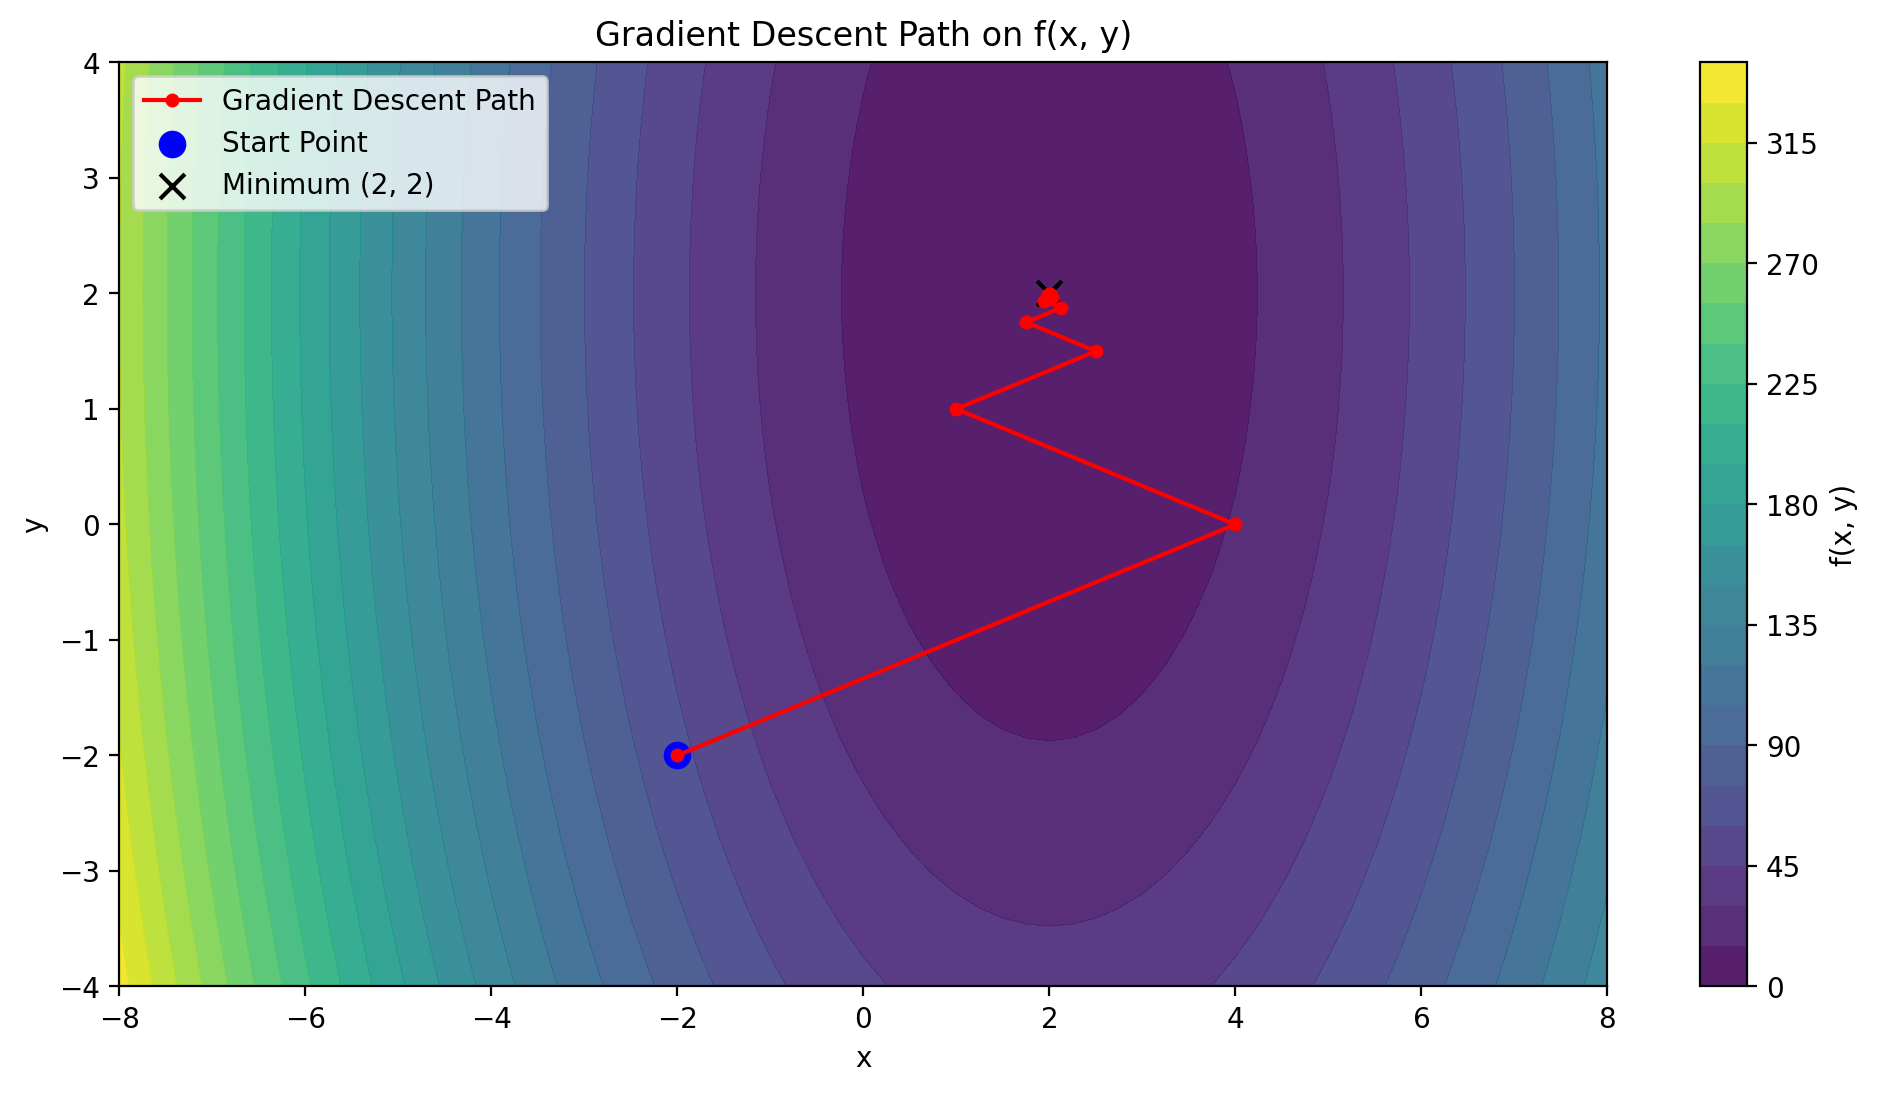

In [1296]:
# 정의역
xmin, xmax, xstep = -8.0, 8.0, .25
ymin, ymax, ystep = -4.0, 4.0, .125
x_vals = np.arange(xmin, xmax + xstep, xstep)
y_vals = np.arange(ymin, ymax + ystep, ystep)
x, y = np.meshgrid(x_vals, y_vals)
f_xy = f(x, y)

# 최소값
minima_ = (2, 2)

# 초기값
x0 = np.array([-2., -2.])

# Gradient Descent 실행
xopt, fopt, paths, fval_paths = gradient_descent_twod(f, grad_f_x, grad_f_y, x0)

# --- Contour + Path Plot ---
plt.figure(figsize=(12, 6))

# Contour
contours = plt.contourf(x, y, f_xy, levels=30, cmap='viridis', alpha=0.9)
plt.colorbar(contours, label='f(x, y)')

# Gradient Descent Path
plt.plot(paths[0, :], paths[1, :], color='red', marker='o', markersize=4,
         linewidth=1.5, label='Gradient Descent Path')

# Start and Minimum Points
plt.scatter(x0[0], x0[1], color='blue', s=80, label='Start Point')
plt.scatter(minima_[0], minima_[1], color='black', s=80, marker='x', label='Minimum (2, 2)')

# Labels and Legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path on f(x, y)')
plt.legend(loc='upper left')
plt.show()

### 6.3.2 그래디언트 디센트 방법의 한계점

#### 초깃값 민감성

000 : 2.851, 8.17E-01
000 : 1.224, 1.15E+00


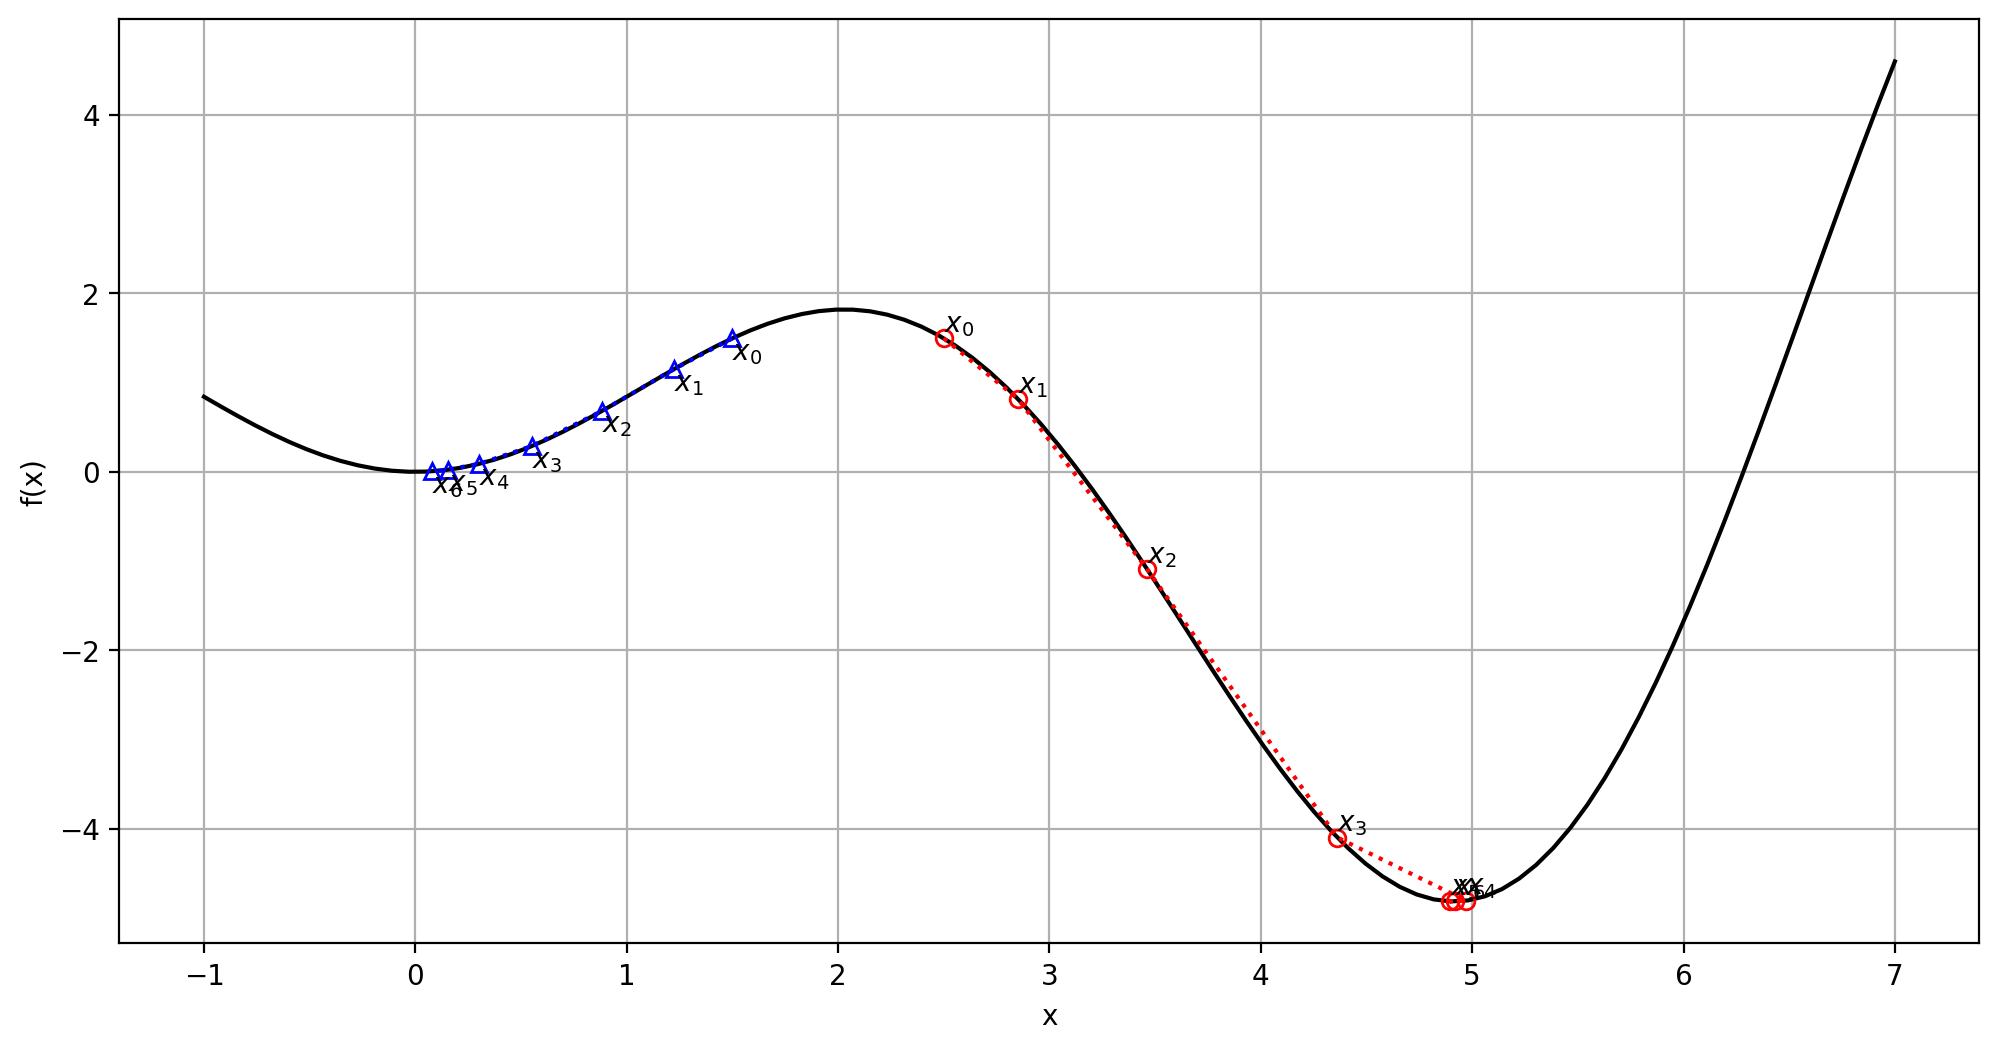

In [1297]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분


x0 = 2.5 # 초깃값1
xopt1, _, paths1 = gradient_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

x0 = 1.5 # 초깃값2
xopt2, _, paths2 = gradient_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

# 그래프

plt.figure(figsize=(12, 6))

plt.plot(x, y, 'k-')
plt.plot(paths1, f(paths1), 'ro:', markerfacecolor='none')
plt.plot(paths2, f(paths2), 'b^:', markerfacecolor='none')
for k, point in enumerate(paths1):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
for k, point in enumerate(paths2):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='top')
    
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

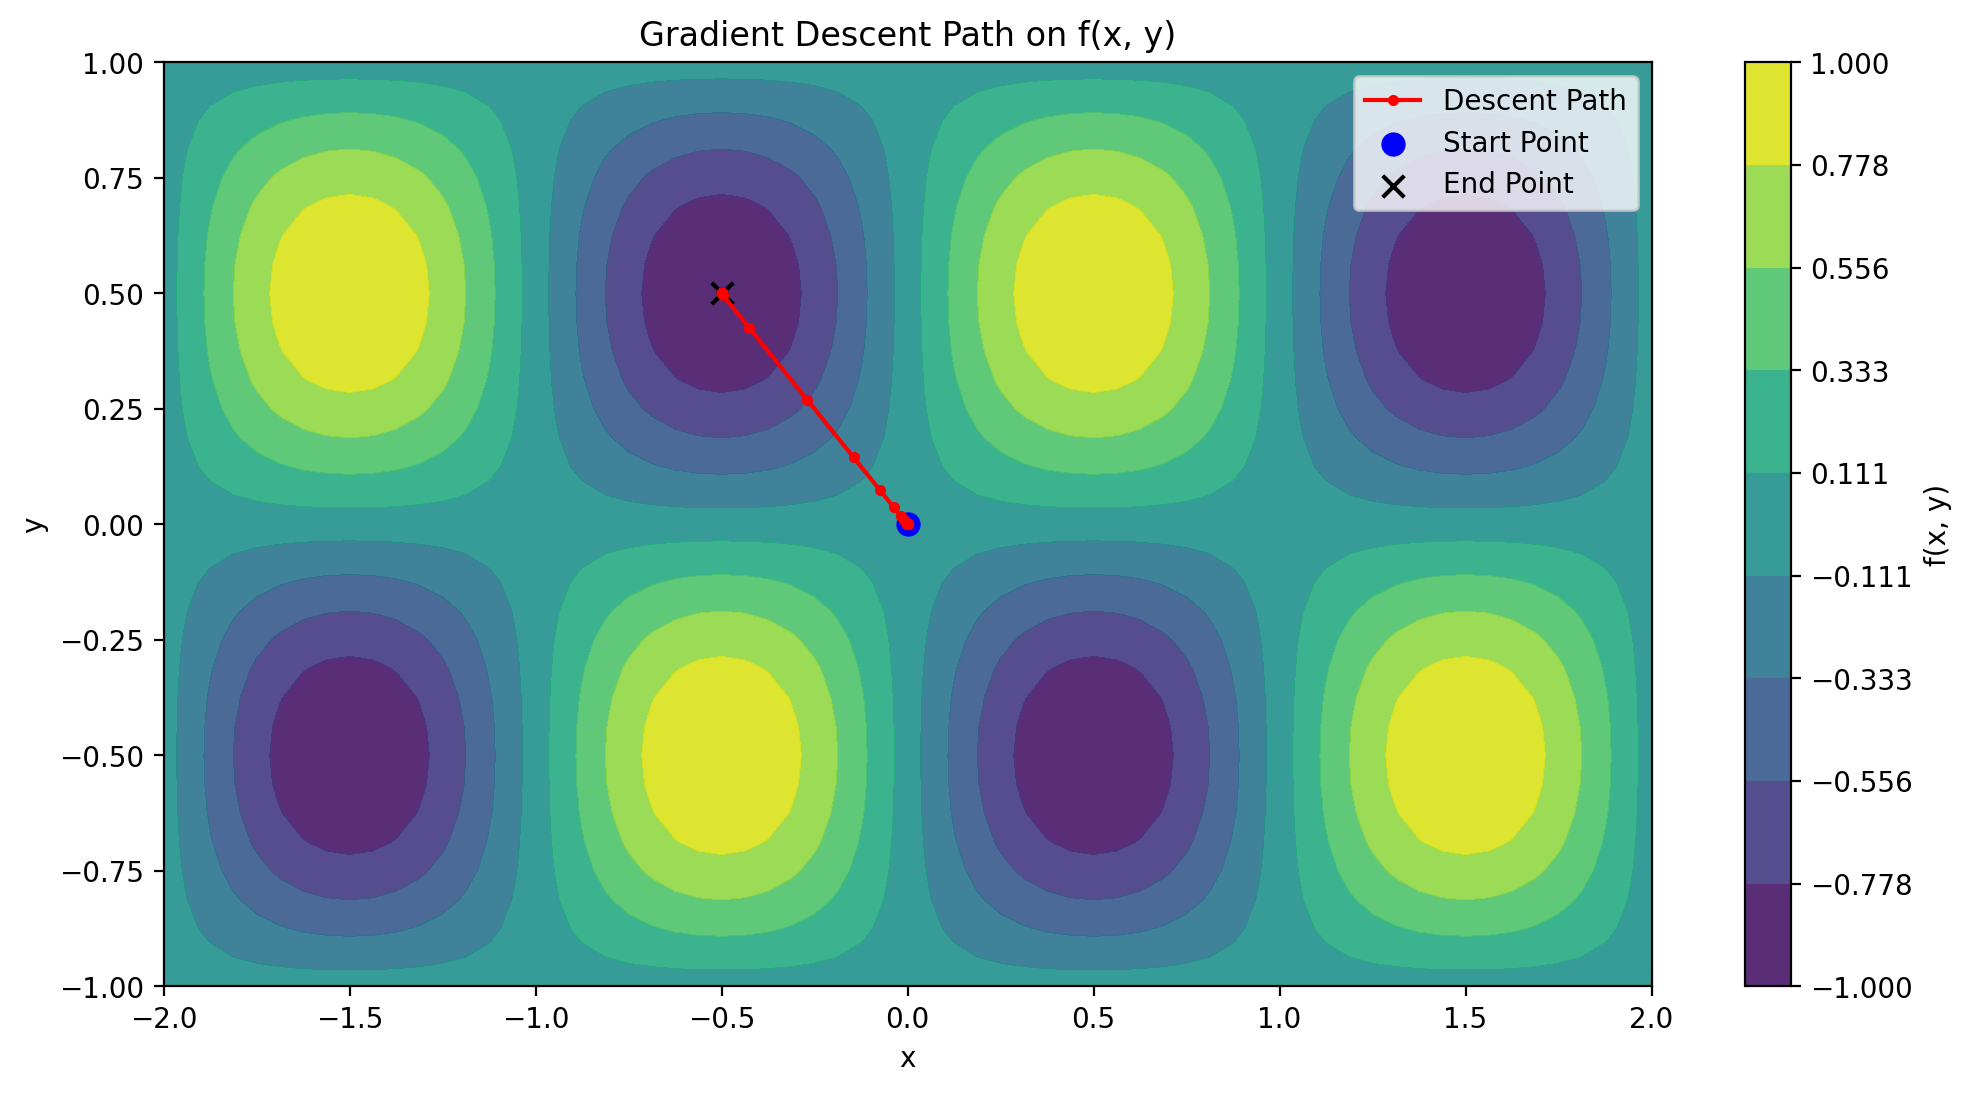

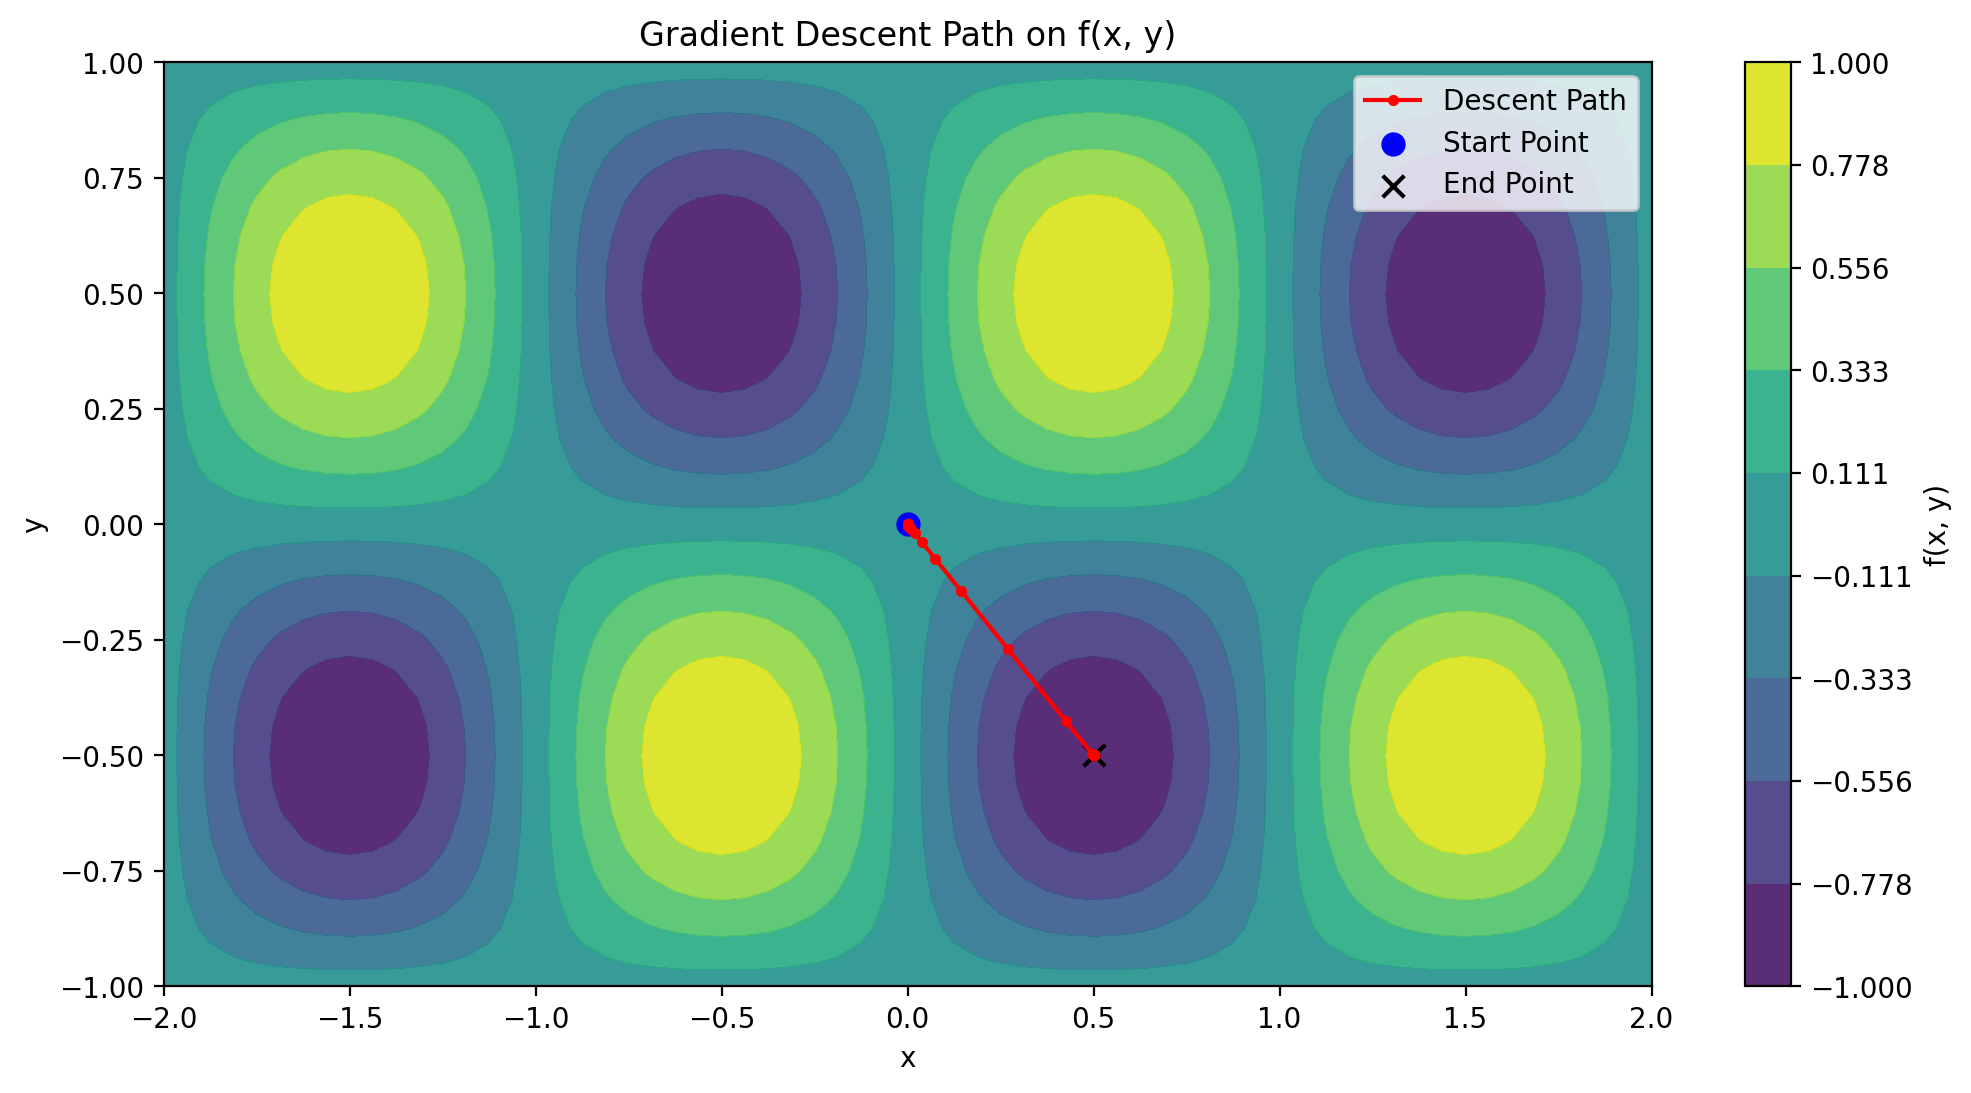

In [1298]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function and Gradients ---
f = lambda x, y: np.sin(np.pi * x) * np.sin(np.pi * y)
grad_f_x = lambda x, y: np.pi * np.cos(np.pi * x) * np.sin(np.pi * y)
grad_f_y = lambda x, y: np.pi * np.sin(np.pi * x) * np.cos(np.pi * y)

# --- Gradient Descent Implementation ---
def gradient_descent_2d(func, gradx, grady, x0, learning_rate=0.1, MaxIter=100):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for _ in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        paths.append(x1)
        fval_paths.append(func(*x1))
        x0 = x1
    paths = np.array(paths).T  # shape (2, N)
    fval_paths = np.array(fval_paths)
    return x0, fval_paths[-1], paths, fval_paths

# --- Domain for Contours ---
xmin, xmax, xstep = -2.0, 2.0, 0.0625
ymin, ymax, ystep = -1.0, 1.0, 0.0625
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

# --- Visualization Function ---
def contour_with_path(f, x, y, paths, levels=np.linspace(-1, 1, 10)):
    plt.figure(figsize=(12, 6))
    contour = plt.contourf(x, y, f(x, y), levels=levels, cmap='viridis', alpha=0.9)
    plt.colorbar(contour, label='f(x, y)')
    
    # Gradient descent path
    plt.plot(paths[0, :], paths[1, :], 'r-o', markersize=3, linewidth=1.5, label='Descent Path')
    plt.scatter(paths[0, 0], paths[1, 0], color='blue', s=60, label='Start Point')
    plt.scatter(paths[0, -1], paths[1, -1], color='black', s=60, marker='x', label='End Point')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Path on f(x, y)')
    plt.legend(loc='upper right')
    plt.show()

# --- Run Gradient Descent from Two Initial Points ---
learning_rate = 0.1

# Start 1
x0 = np.array([0.0, 0.00001])
xopt, fopt, paths, fval_paths = gradient_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate)
contour_with_path(f, x, y, paths)

# Start 2
x0 = np.array([0.0, -0.00001])
xopt, fopt, paths, fval_paths = gradient_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate)
contour_with_path(f, x, y, paths)

#### 학습률 민감성

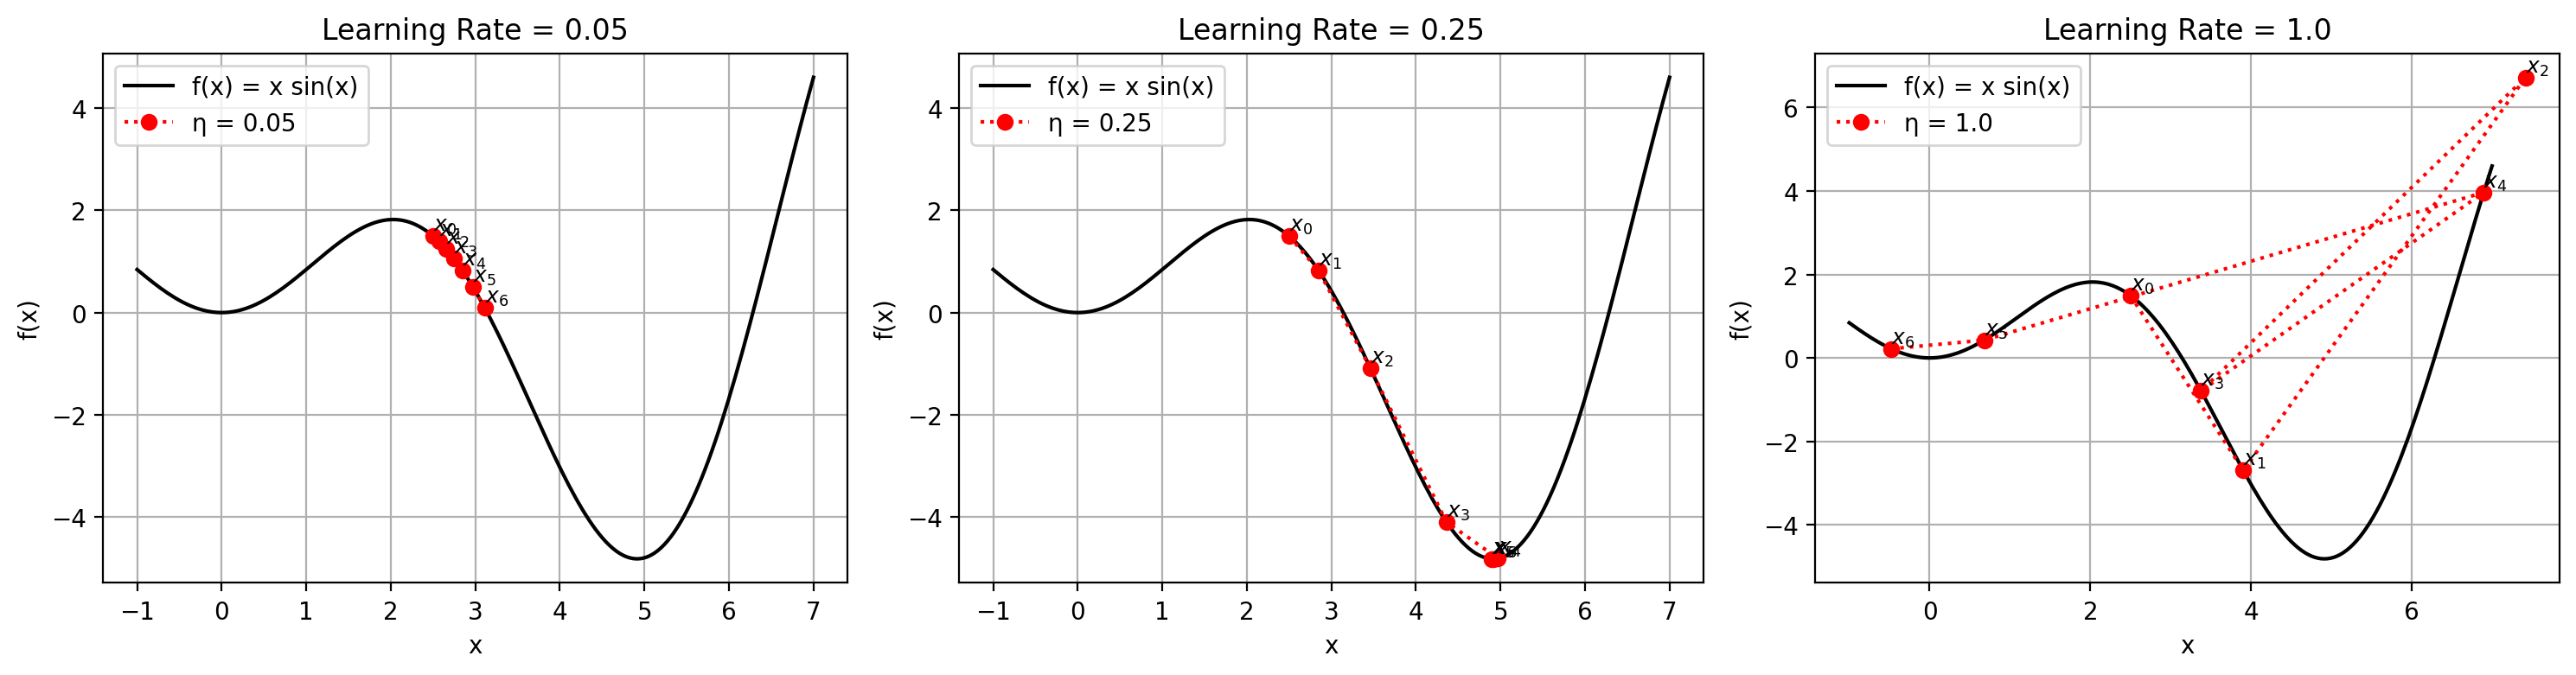

In [1299]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function and Gradient ---
f = lambda x: x * np.sin(x)
grad_f = lambda x: np.sin(x) + x * np.cos(x)

# --- Gradient Descent Implementation ---
def gradient_descent(func, grad, x0, learning_rate=0.05, MaxIter=6):
    paths = [x0]
    for _ in range(MaxIter):
        x0 = x0 - learning_rate * grad(x0)
        paths.append(x0)
    paths = np.array(paths)
    fopt = func(paths[-1])
    return x0, fopt, paths

# --- Visualization Function ---
def plot_descent(f, x, paths, label, ax):
    y = f(x)
    ax.plot(x, y, 'k-', label='f(x) = x sin(x)')
    ax.plot(paths, f(paths), 'ro:', label=label)
    for k, point in enumerate(paths):
        ax.text(point, f(point), f'$x_{{{k}}}$', verticalalignment='bottom', fontsize=9)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)
    ax.legend()

# --- Domain ---
x = np.linspace(-1, 7, 200)

# --- Initial value and learning rates ---
x0 = 2.5
learning_rates = [0.05, 0.25, 1.00]

# --- Plot All Results in a Single Figure ---
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for lr, ax in zip(learning_rates, axes):
    xopt, fopt, paths = gradient_descent(f, grad_f, x0, learning_rate=lr, MaxIter=6)
    plot_descent(f, x, paths, label=f'η = {lr}', ax=ax)
    ax.set_title(f'Learning Rate = {lr}')

plt.tight_layout()
plt.show()

## 6.4 그래디언트 디센트를 사용한 선형회귀 모델 학습

### 6.4.1 선형회귀 문제 수식 소개

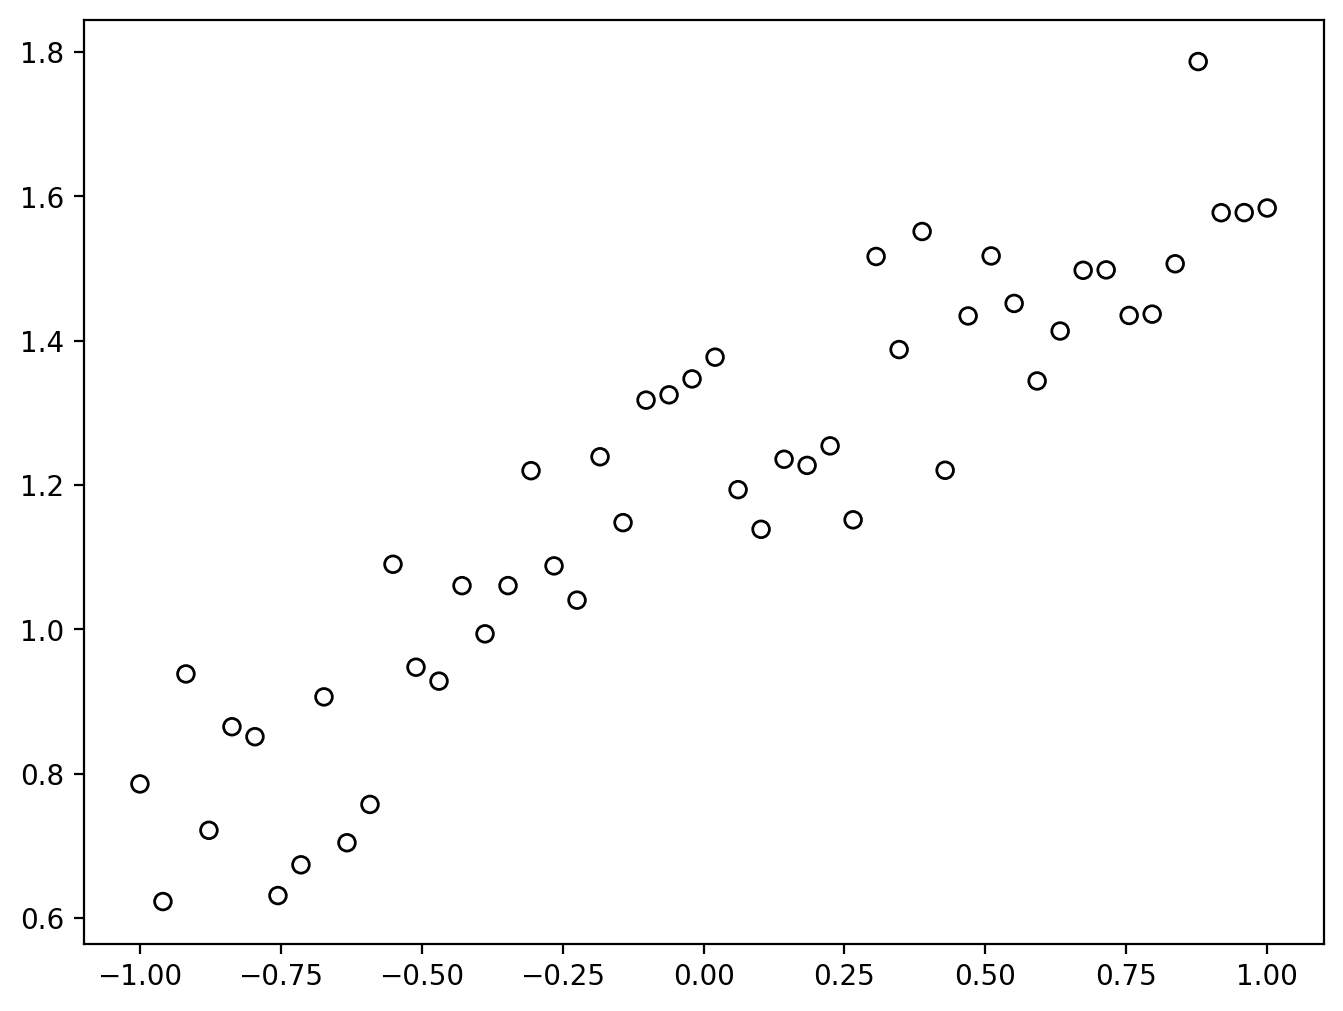

In [1300]:
# Target function
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='k', marker='o', facecolors='none')
plt.show()

### 6.4.2 그래디언트 디센트 방법 적용

## 손실 함수와 그라디언트(Gradient) 유도

### 선형 회귀 가정 (Linear Regression Assumption)

데이터셋 $(x_i, y_i)$ $(i = 1, 2, ..., N)$에 대해 다음과 같은 **선형 모델(linear model)** 을 가정

$$
\hat{y}_i = a x_i + b
$$

여기서  
- \(a\) : 기울기(slope) 또는 가중치(weight)  
- \(b\) : 절편(intercept) 또는 바이어스(bias)  

---

### 손실 함수 (Loss Function)

모델이 예측한 값 $\hat{y}_i$와 실제 값 $y_i$ 간의 평균 제곱 오차(MSE, Mean Squared Error)를 손실로 정의

$$
L(a, b) = \frac{1}{2N} \sum_{i=1}^{N} (a x_i + b - y_i)^2
$$

코드에서는 $\frac{1}{2}$를 포함시켜 이후 미분 시 수식이 단순해짐

```python
def loss(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        val += 0.5 * (a * x_train[i] + b - y_train[i])**2
    return val / N

In [1301]:
# 손실함수
def loss(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        val += 0.5 * ( a * x_train[i] + b - y_train[i] )**2
    return val / N

# 손실함수의 a방향 미분
def loss_grad_a(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er * x_train[i]
    return val / N

# 손실함수의 b방향 미분
def loss_grad_b(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er
    return val / N

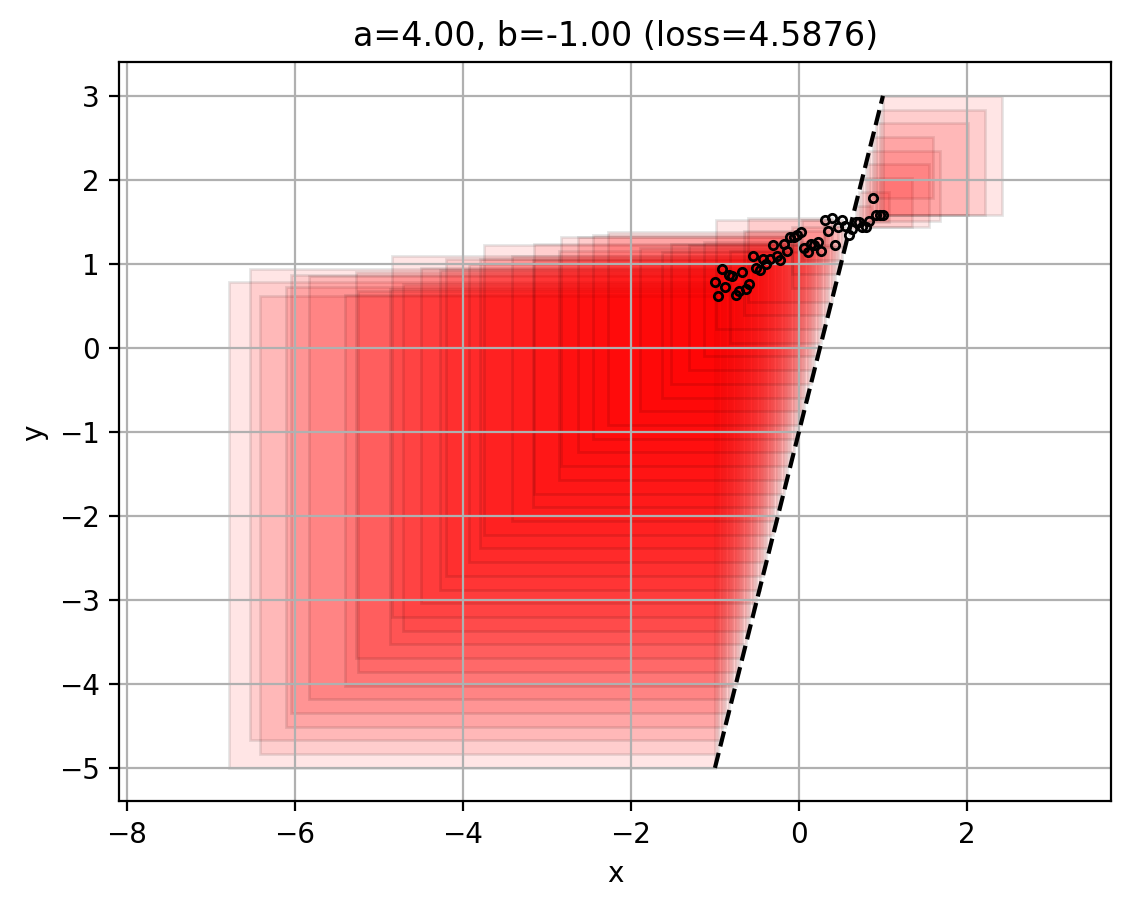

In [1302]:
def visualize_l2(a, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = loss.__name__
    # plt.figure(figsize=(12, 6))
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, a * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        a * xx + b - yy, a * xx + b - yy,
                              alpha=0.1, facecolor='red', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f} ({}={:5.4f})".format(a, b, loss_name, loss(a,b)))

visualize_l2(4, -1, x_train, y_train, loss)
plt.show()

In [1303]:
def gradient_descent_2d(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        x0 = x1
        fval = func(*x0)
        paths.append(x0)
        fval_paths.append(fval)
        
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    
    return(x0, fval, paths, fval_paths)

In [1304]:
w0 = np.array([-4, -1]) 
wopt, fopt, paths, fval_paths = gradient_descent_2d(loss, loss_grad_a, loss_grad_b, w0, learning_rate=0.5, MaxIter=30)

In [1305]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def contour_with_path(func, A, B, paths=None, norm=None, level=None):
    
    # Compute function values
    Z = func(A, B) if callable(func) else A * 0  # fallback

    plt.figure(figsize=(12, 6))

    # Normalize colors if provided
    if norm is None:
        norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))

    # Filled contour
    contours = plt.contourf(A, B, Z, levels=level, cmap='viridis', norm=norm, alpha=0.9)
    plt.colorbar(contours, label='Loss(a, b)')

    # Optional descent path overlay
    if paths is not None:
        plt.plot(paths[0, :], paths[1, :], 'r-o', markersize=3, linewidth=1.5, label='Descent Path')
        plt.scatter(paths[0, 0], paths[1, 0], color='blue', s=60, label='Start Point')
        plt.scatter(paths[0, -1], paths[1, -1], color='black', s=60, marker='x', label='End Point')

    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Loss Surface Contour with Gradient Descent Path')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

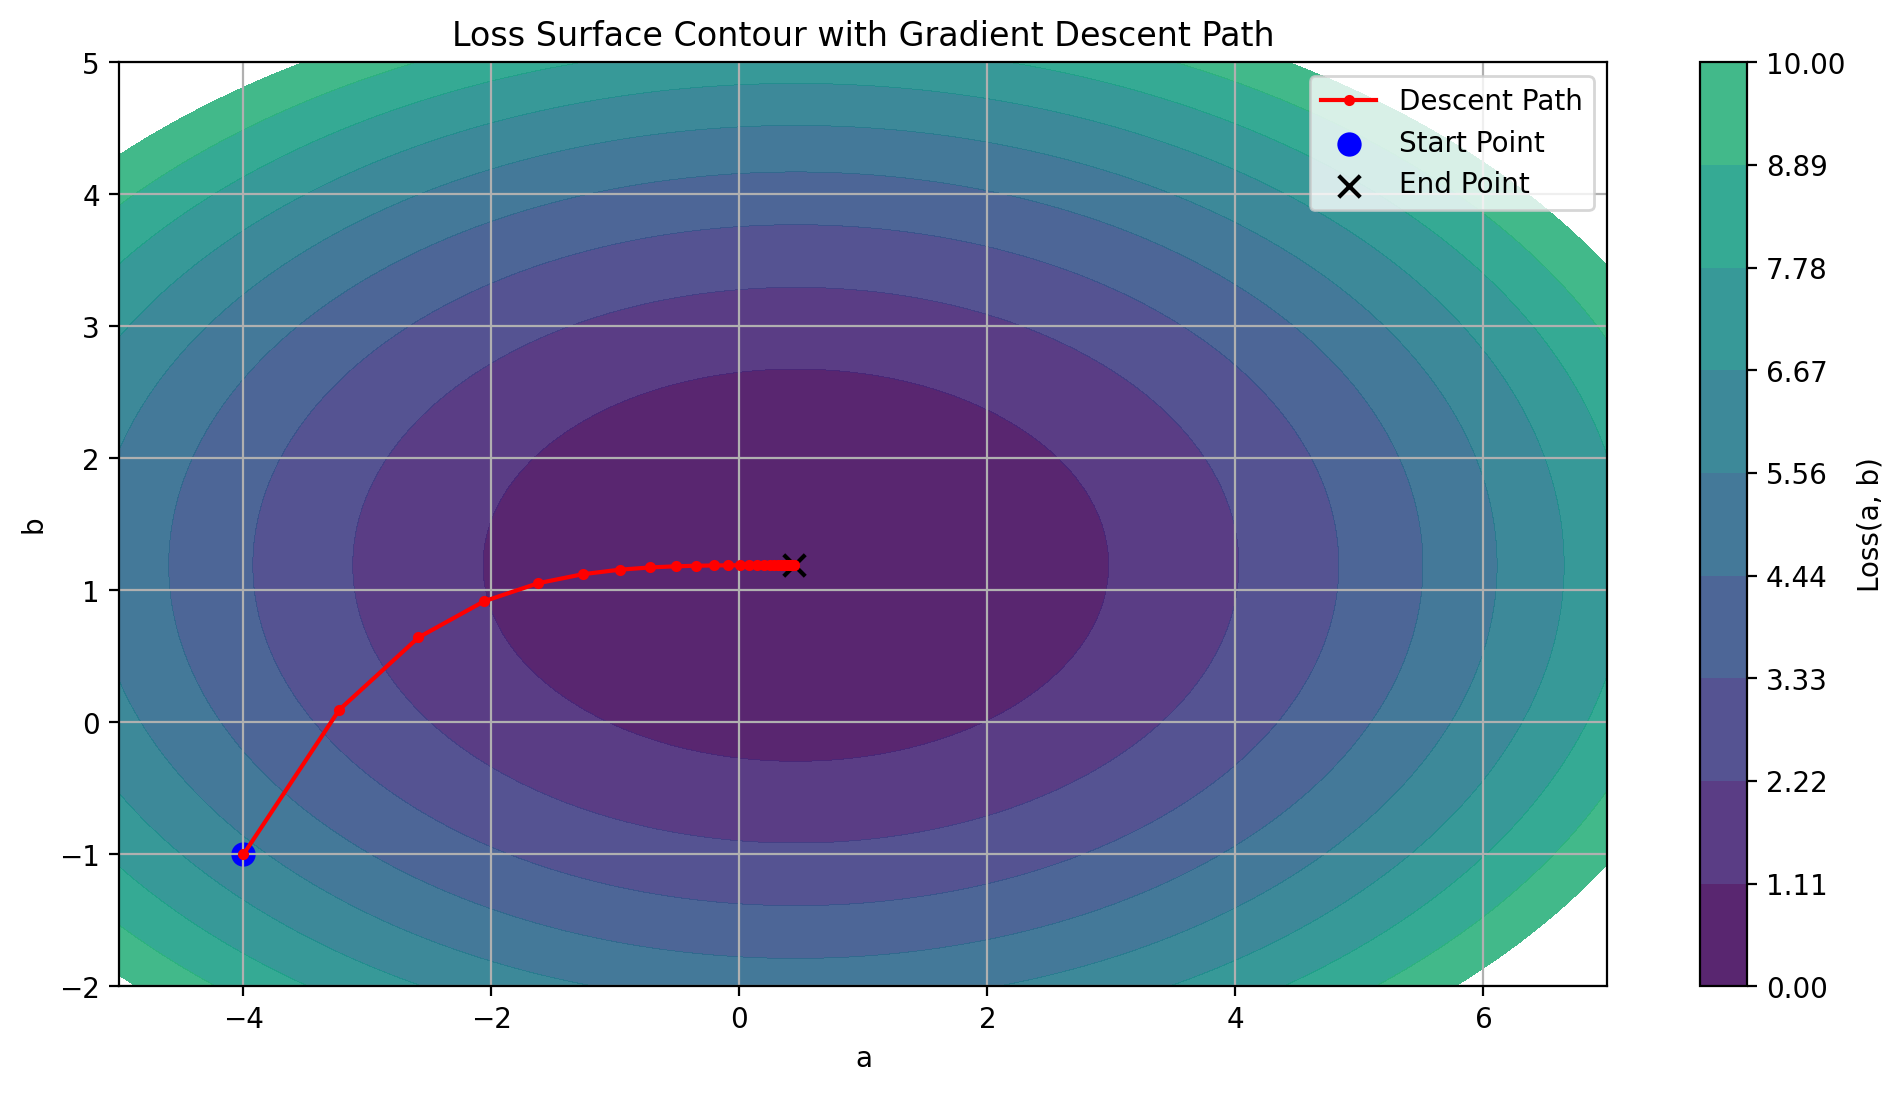

In [1306]:
a = np.linspace(-5, 7, 101)
b = np.linspace(-2, 5, 101)

A, B = np.meshgrid(a,b)

LOSSW = A * 0
for i in range(LOSSW.shape[0]):
    for j in range(LOSSW.shape[1]):
        aij, bij = A[i,j], B[i,j]
        LOSSW[i,j] = loss(aij, bij)

contour_with_path(loss, A, B, paths, norm=None, level=np.linspace(0, 10, 10))

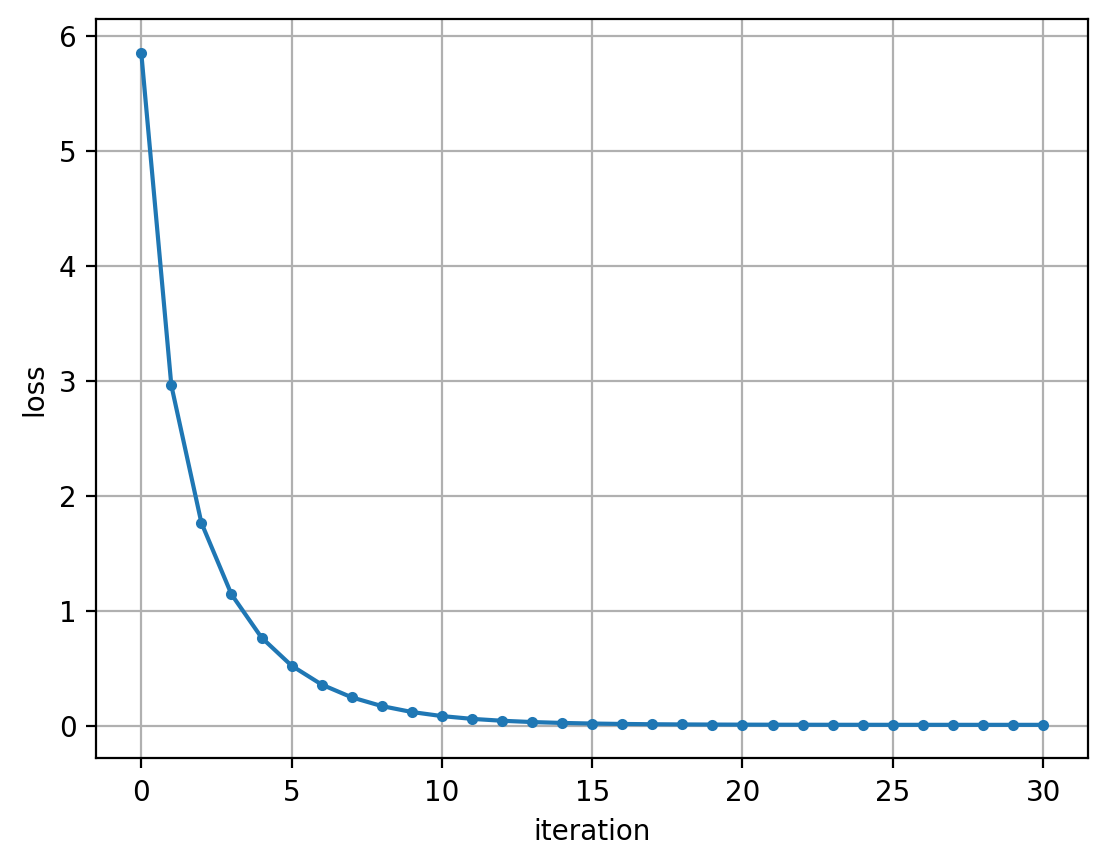

In [1307]:
plt.plot(fval_paths, '.-')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

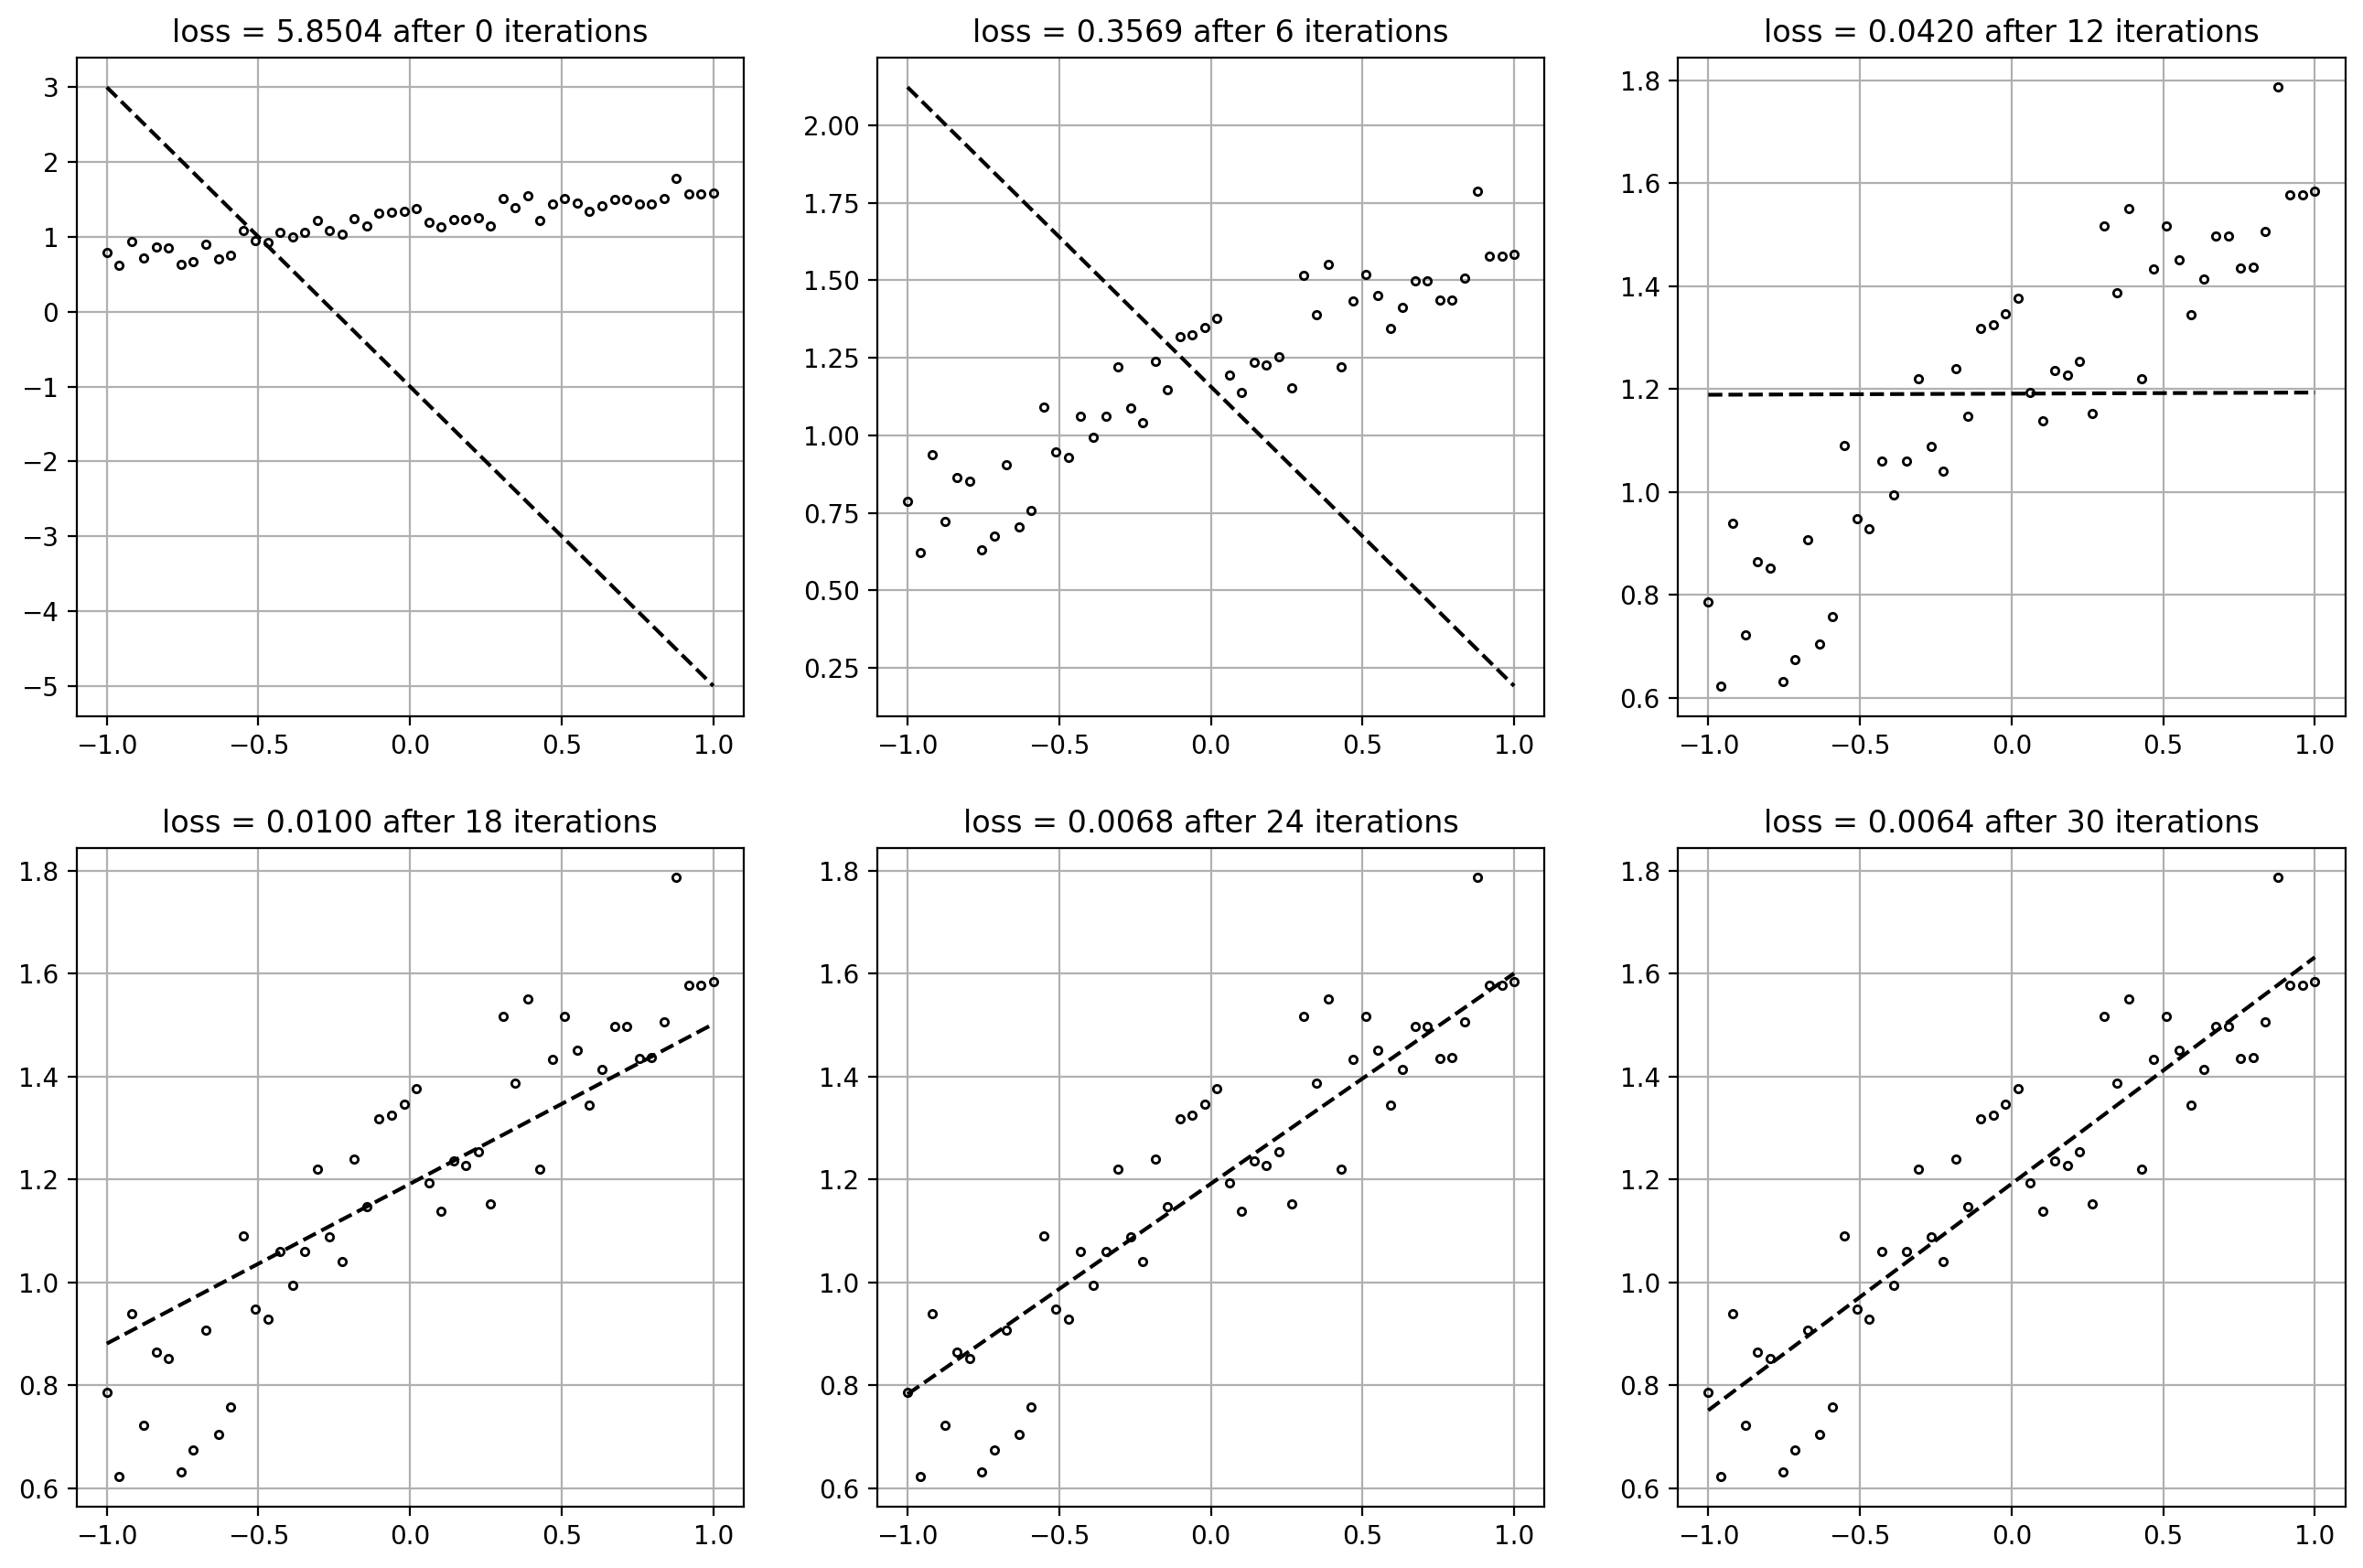

In [1308]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, paths[0, i] * x_train + paths[1, i], 'k--')
    plt.grid()
    plt.title('loss = {:5.4f} after {:d} iterations'.format(fval_paths[i], i))
    k+=1
plt.show()

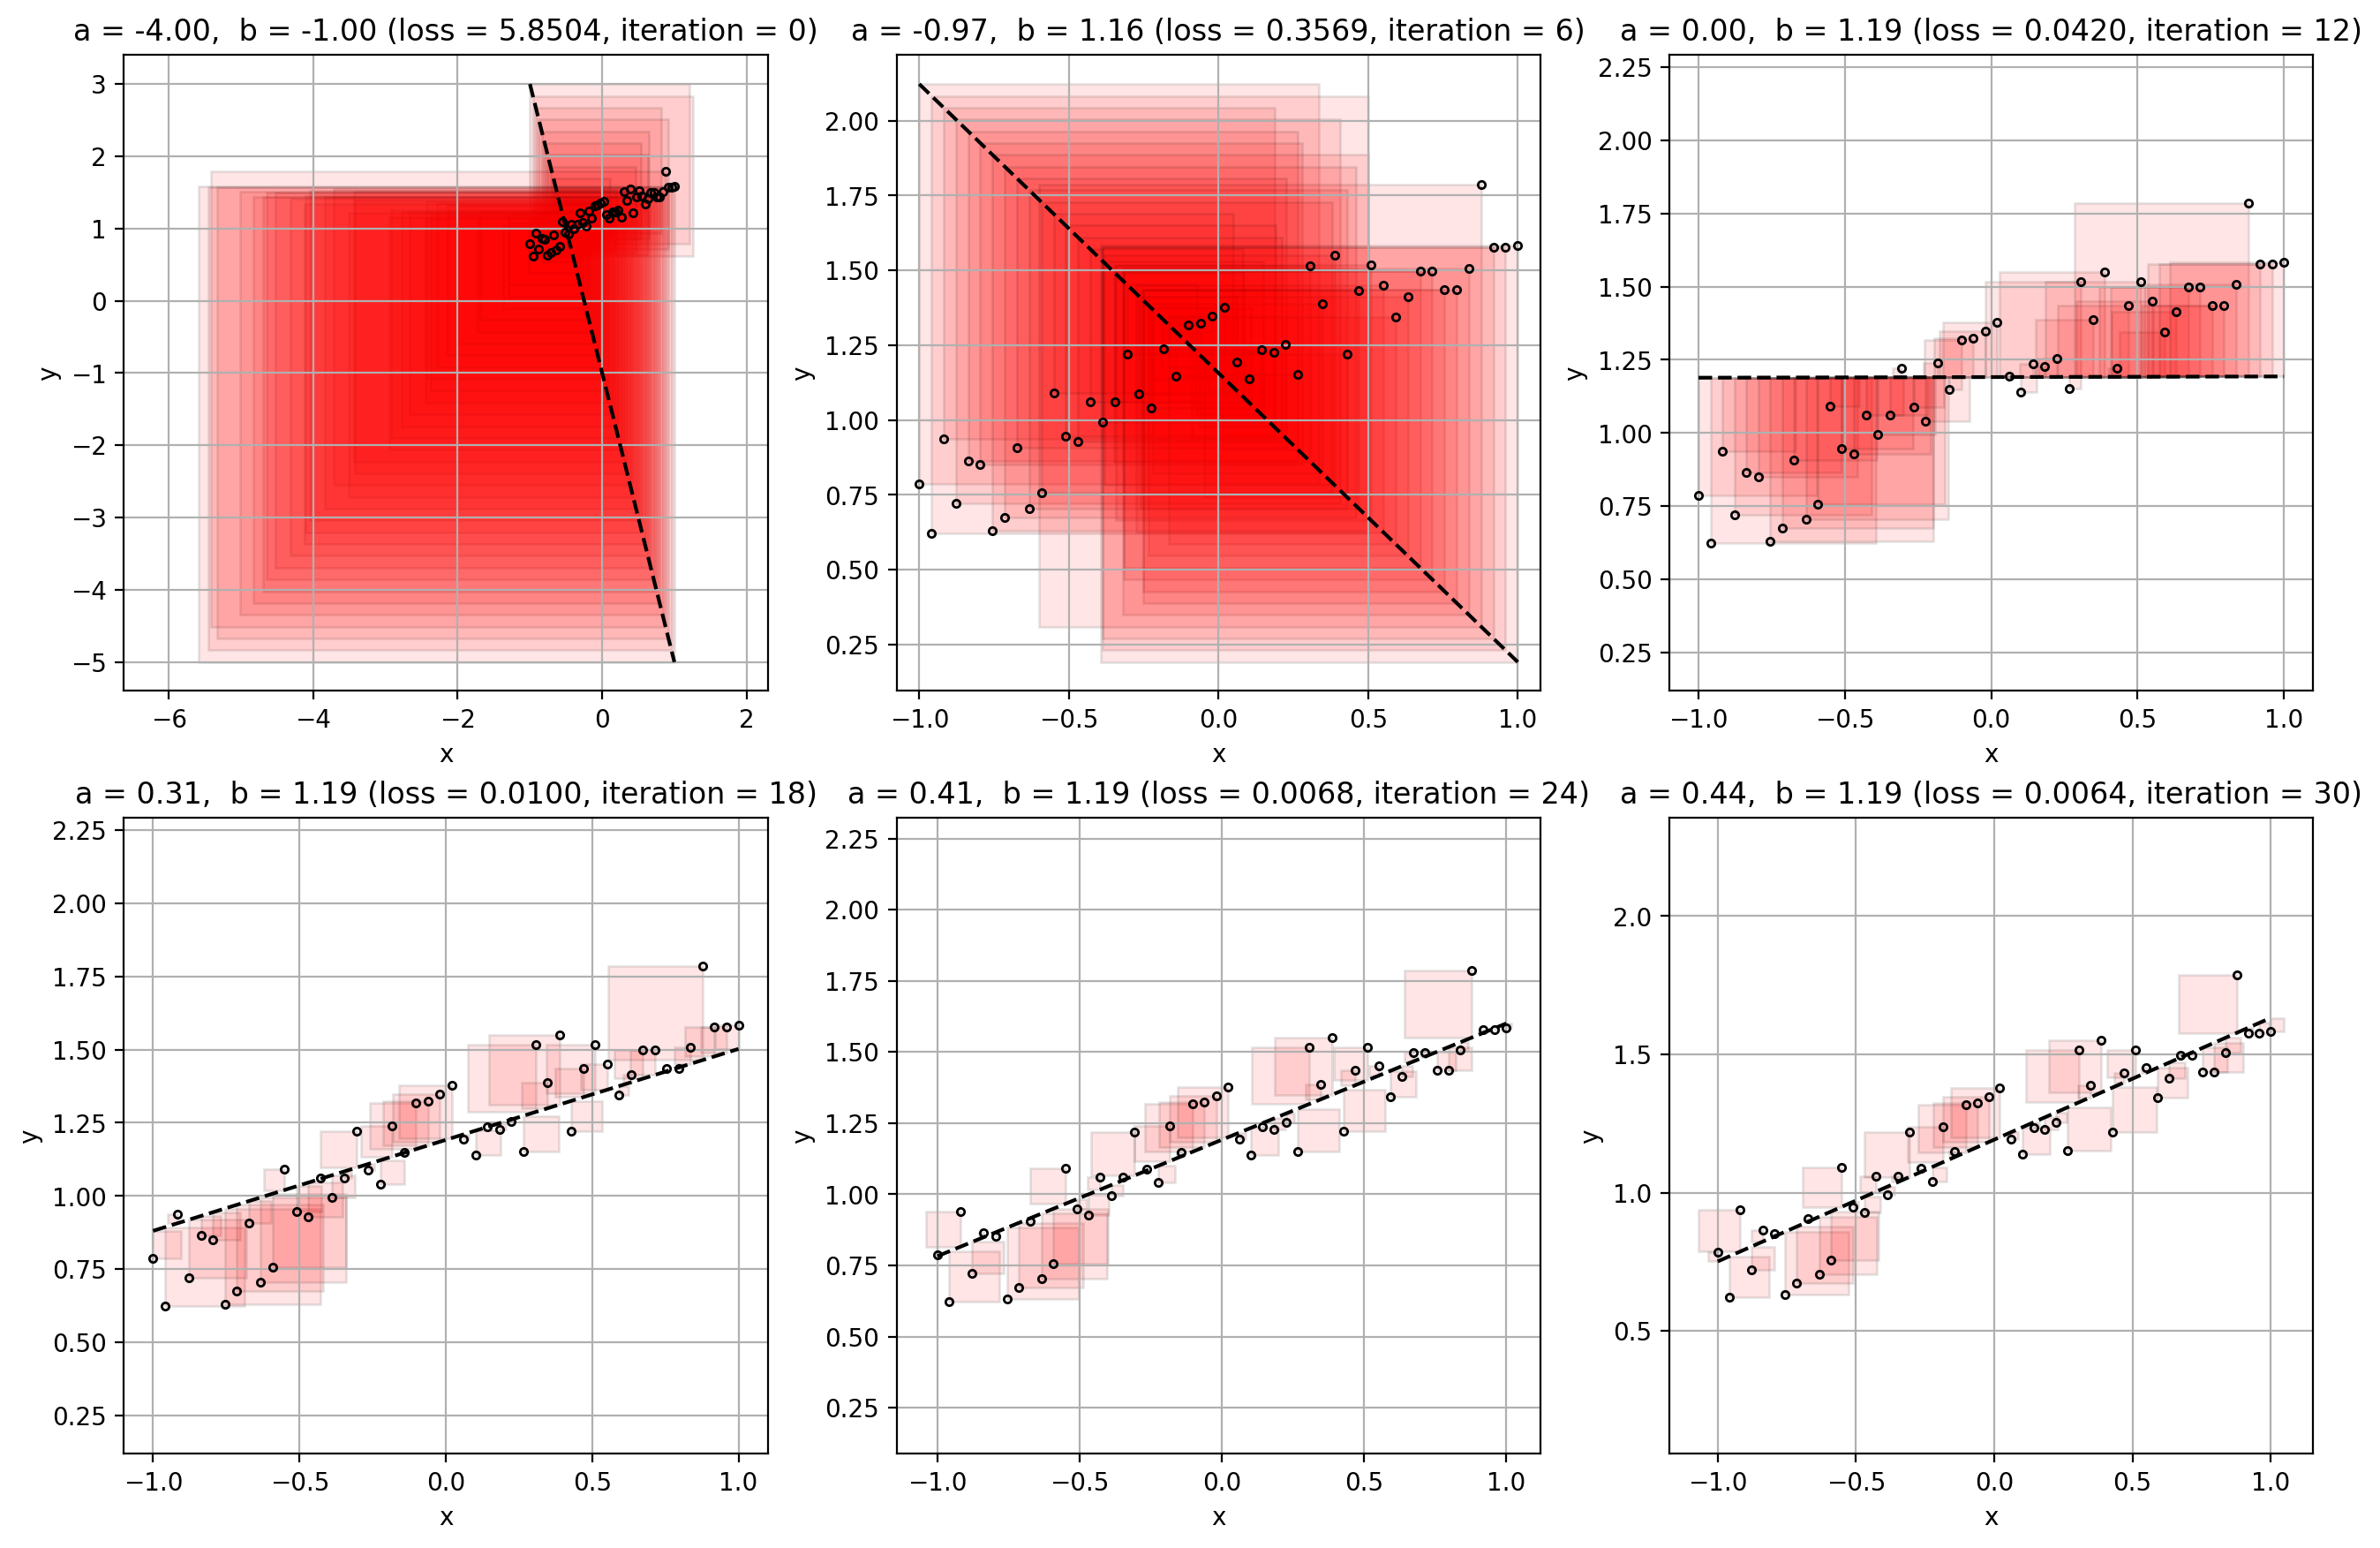

In [1309]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    ai, bi = paths[0:2, i]
    visualize_l2(ai, bi, x_train, y_train, loss)
    plt.title('a = {:3.2f},  b = {:3.2f} (loss = {:5.4f}, iteration = {:d})'.format(ai, bi, fval_paths[i], i))
    k+=1
plt.show()

#### 일반화

In [ ]:
# 손실함수
def loss(w, x_set, y_set):
    
    N = len(x_set)
    val = 0.0
    
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

# 손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    
    N = len(x_set)
    val = np.zeros(len(w)) # 그래디언트
    
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [ ]:
def gradient_descent_nd(func, grad_func, w0, x_set, y_set, MaxIter=10, learning_rate=0.25):
    paths = [w0]
    fval_paths = [func(w0, x_set, y_set)]
    
    for i in range(MaxIter):
        grad = grad_func(w0, x_set, y_set)
        w1 = w0 - learning_rate * grad
        fval = func(w0, x_set, y_set)
        w0 = w1
        paths.append(w0)
        fval_paths.append(fval)
    
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    
    return (w0, fval, paths, fval_paths)

In [1312]:
w0 = np.array([-4, -1])
wopt, fopt, paths, fval_paths = gradient_descent_nd(loss, loss_grad, w0,
                                                    x_train, y_train, learning_rate=0.5, MaxIter=30)
print(wopt)

[0.44031858 1.19143584]
